
# Lezione 0: Il Cambio di Paradigma

## Cos'è davvero il Machine Learning?

Spesso si pensa al Machine Learning (ML) come a una "magia" che accade dentro una scatola nera. In realtà, è una disciplina puramente matematica e statistica.

Possiamo definirlo formalmente citando **Tom Mitchell (1997)**:

> "Si dice che un programma apprende dall'esperienza **E** rispetto a un compito **T** e una misura di prestazione **P**, se la sua prestazione in **T**, misurata da **P**, migliora con l'esperienza **E**."

In termini aziendali:

  * **T (Task):** Il problema (es. predire se un cliente abbandonerà il servizio).
  * **E (Experience):** I Dati storici (es. il comportamento passato dei clienti).
  * **P (Performance):** Una metrica di successo (es. la percentuale di clienti indovinati correttamente).

### 1\. Programmazione Tradizionale vs Machine Learning

La differenza fondamentale sta nel flusso logico.

  * **Programmazione Tradizionale (Software Engineering):**
    Tu (lo sviluppatore) devi capire le regole del mondo. Scrivi algoritmi espliciti (`if`, `else`, `while`).

      * *Input:* Dati + Regole (Codice).
      * *Output:* Risposte.
      * *Problema:* Scrivere regole per riconoscere un gatto in una foto è impossibile. Ci sono troppe eccezioni.

  * **Machine Learning:**
    Tu non conosci le regole. Tu fornisci alla macchina gli esempi (Input e Output desiderato) e lasci che sia l'algoritmo a trovare le regole matematiche che legano gli uni agli altri.

      * *Input:* Dati + Risposte (Labels).
      * *Output:* Regole (Il Modello).

### 2\. La Tassonomia degli Algoritmi

Nel mondo del lavoro, il 90% dei problemi ricade in due macro-categorie. È vitale saper distinguere subito cosa vi viene chiesto.

#### A. Apprendimento Supervisionato (Supervised Learning)

È il caso più comune in azienda. Abbiamo un dataset storico che contiene sia gli input che le risposte corrette. Il modello agisce come uno studente che ha il libro con le soluzioni: si esercita sugli esempi finché non impara a generalizzare.

Si divide in due sottocategorie fondamentali:

1.  **Regressione:** La risposta che cerchiamo è un **numero continuo** (quantità).
      * *Esempio:* Prevedere il prezzo di una casa, il fatturato del mese prossimo, la temperatura.
2.  **Classificazione:** La risposta che cerchiamo è una **categoria** (etichetta discreta).
      * *Esempio:* Questa mail è Spam o No? Il tumore è benigno o maligno? Il cliente comprerà (Sì/No)?

#### B. Apprendimento Non Supervisionato (Unsupervised Learning)

Qui non abbiamo le risposte (nessuna etichetta). Abbiamo solo dati grezzi. L'obiettivo non è predire, ma **descrivere** o **scoprire strutture nascoste**.

  * *Esempio:* Segmentare i clienti in gruppi simili per il marketing (Clustering), rilevare anomalie in una catena di montaggio.

[Image of machine learning types taxonomy supervised unsupervised reinforcement]

-----

### 3\. La Matematica dei Dati: La Notazione Standard

Per tutto il corso useremo una notazione standard internazionale. 

Immaginate un foglio Excel. Nel ML, questo diventa algebra lineare.

  * **Dataset ($X$):** Una matrice di dimensioni $(n, d)$.

      * $n$ = numero di campioni (righe, esempi, utenti).
      * $d$ = numero di feature (colonne, caratteristiche, variabili).
      * Si denota con la lettera maiuscola $X$ perché è una matrice.
      * $x^{(i)}$ rappresenta l'i-esimo esempio (un vettore riga).

  * **Target ($y$):** Un vettore colonna di dimensione $(n, 1)$.

      * Contiene le risposte corrette (le etichette).
      * Si denota con la lettera minuscola $y$ perché è un vettore.

**L'obiettivo del ML:**
Trovare una funzione matematica $f$ tale che:
$$\hat{y} = f(X)$$
Dove $\hat{y}$ (si legge "y hat") è la nostra previsione, e vogliamo che sia il più possibile vicina alla $y$ reale.

-----

### 4\. Esempio Pratico: "Hard Coding" vs "Learning"

Vediamo come cambia l'approccio mentale con un esempio Python (concettuale).

**Scenario:** Vogliamo decidere se approvare un prestito basandoci su *Salario* e *Debito*.

**Approccio Tradizionale (Rule-Based):**
Devi inventare tu le soglie. È fragile e soggettivo.

```python
def approva_prestito_tradizionale(salario, debito):
    # Regole scritte a mano dallo sviluppatore (Hard coding)
    if salario > 50000 and debito < 10000:
        return True
    elif salario > 100000:
        return True
    else:
        return False
```

**Approccio Machine Learning (Scikit-Learn):**
Non scriviamo `if`. Passiamo i dati a un algoritmo (es. Decision Tree) che troverà le soglie ottimali matematicamente.

```python
from sklearn.tree import DecisionTreeClassifier

# 1. Istanziamo il modello (il contenitore vuoto)
model = DecisionTreeClassifier()

# 2. Addestramento (Fitting)
# X = Matrice con colonne [Salario, Debito] di 10.000 persone
# y = Vettore con [Approvato, Non Approvato] per quelle 10.000 persone
model.fit(X, y) 

# 3. Ora il modello ha "imparato" le regole da solo.
# Possiamo chiedergli previsioni su nuovi clienti.
nuovo_cliente = [[45000, 2000]] 
previsione = model.predict(nuovo_cliente)
```

### Sintesi

Il Machine Learning non è altro che **l'approssimazione di funzioni tramite dati**. Invece di scrivere la funzione, usiamo algoritmi di ottimizzazione per trovarla.



# Modulo 1: Feature Engineering & Preprocessing Matematico

## Parte 1: Feature Scaling (Standardizzazione vs Normalizzazione)

Perché dobbiamo scalare i dati?
Immaginate un dataset con due feature per predire il prezzo di una casa:

1.  **Superficie:** varia da $40$ a $200$ $m^2$.
2.  **Numero di Stanze:** varia da $1$ a $5$.

Se usiamo un algoritmo basato sulla distanza (come K-Nearest Neighbors) o sull'ottimizzazione del gradiente (come Regressione Lineare o Reti Neurali), la feature "Superficie" dominerà completamente il calcolo. Una differenza di 1 stanza ($1$) è matematicamente irrilevante rispetto a una differenza di 10 $m^2$ ($10$), anche se per il business una stanza in più vale molto.

### 1\. La Matematica dietro lo Scaling

Esistono due tecniche principali. Non sono intercambiabili, hanno proprietà statistiche diverse.

#### A. Normalizzazione (Min-Max Scaling)

Comprime i dati in un range fisso, solitamente $[0, 1]$.
$$X_{norm} = \frac{X - X_{min}}{X_{max} - X_{min}}$$

  * **Quando usarla:** Quando sappiamo che i dati hanno confini rigidi (es. pixel di un'immagine 0-255) o quando l'algoritmo non assume una distribuzione normale dei dati.
  * **Difetto:** È sensibilissima agli **outlier**. Se avete un reddito di 10M€ in un dataset di stipendi medi, tutti gli altri dati verranno schiacciati quasi a 0.

#### B. Standardizzazione (Z-Score Scaling)

Trasforma i dati in modo che abbiano media $\mu = 0$ e deviazione standard $\sigma = 1$.
$$z = \frac{x - \mu}{\sigma}$$

  * **Quando usarla:** È lo standard industriale per la maggior parte degli algoritmi (SVM, Regressione Logistica, Reti Neurali).
  * **Perché:** Preserva la forma della distribuzione (non schiaccia gli outlier nel range 0-1) ma cambia la scala.

### 2\. Perché il Gradiente fallisce senza Scaling? (Approfondimento Matematico)

La maggior parte dei modelli ML cerca il minimo di una **Loss Function** (es. MSE).
Immaginate la Loss Function come una valle tridimensionale.

  * Se le feature hanno scale diverse (es. $x_1 \in [0, 1000]$, $x_2 \in [0, 1]$), la valle è una "gola" stretta e allungata (ellissoide molto eccentrico).
  * L'algoritmo di **Gradient Descent** scende seguendo la pendenza più ripida. In una gola stretta, il gradiente rimbalzerà pazzamente tra le pareti ripide invece di scendere fluido verso il minimo.

Se **Standardizziamo**, la valle diventa una "scodella" perfettamente circolare (sferica). Il gradiente punta dritto al minimo.

### 3\. Laboratorio Python: Visualizzare l'effetto dello Scaling

Vediamo con i nostri occhi l'effetto geometrico.

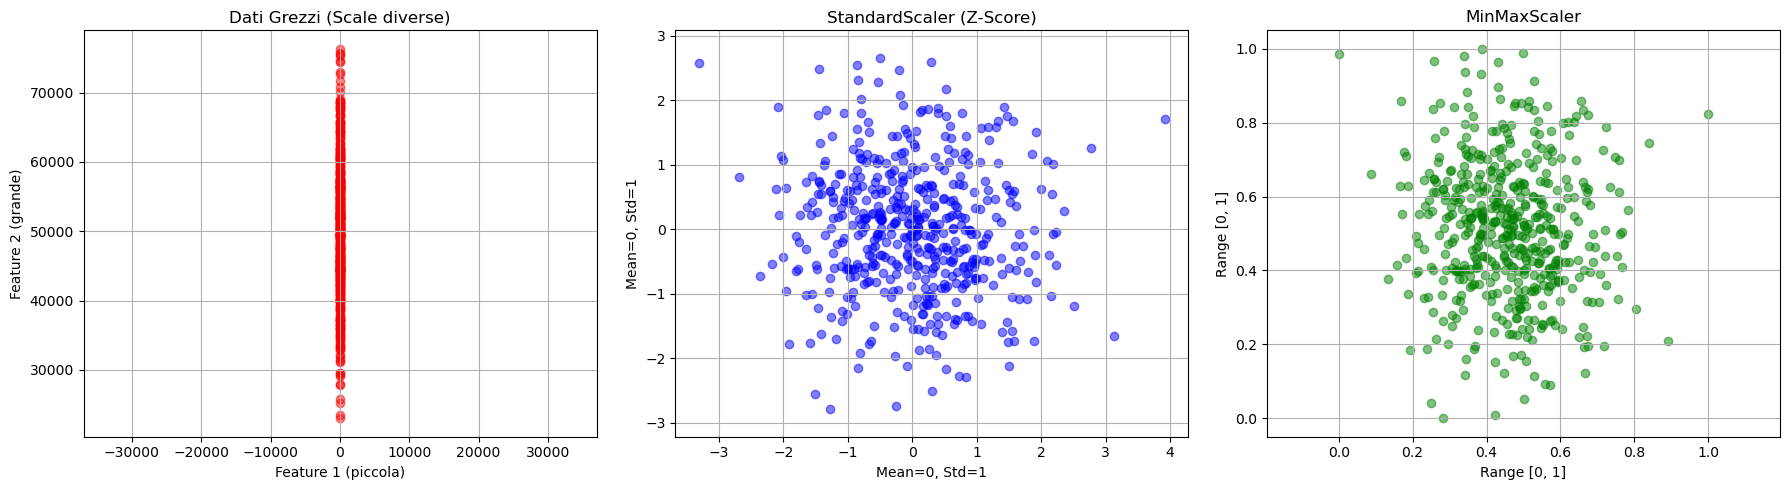

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# 1. Generiamo dati sintetici "sbilanciati"
# Feature 1: range piccolo (es. Età)
# Feature 2: range enorme (es. Salario)
np.random.seed(42)
X_raw = np.array([
    np.random.normal(30, 5, 500),      # Media 30, dev 5
    np.random.normal(50000, 10000, 500) # Media 50k, dev 10k
]).T # Trasponiamo per avere (n_samples, n_features)

# 2. Applichiamo gli Scaler
scaler_std = StandardScaler()
X_std = scaler_std.fit_transform(X_raw)

scaler_minmax = MinMaxScaler()
X_minmax = scaler_minmax.fit_transform(X_raw)

# 3. Visualizzazione
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

# Plot Dati Grezzi
axs[0].scatter(X_raw[:, 0], X_raw[:, 1], color='red', alpha=0.5)
axs[0].set_title("Dati Grezzi (Scale diverse)")
axs[0].set_xlabel("Feature 1 (piccola)")
axs[0].set_ylabel("Feature 2 (grande)")
axs[0].axis('equal')
axs[0].grid(True)

# Plot Standardizzati
axs[1].scatter(X_std[:, 0], X_std[:, 1], color='blue', alpha=0.5)
axs[1].set_title("StandardScaler (Z-Score)")
axs[1].set_xlabel("Mean=0, Std=1")
axs[1].set_ylabel("Mean=0, Std=1")
axs[1].axis('equal')
axs[1].grid(True)
# Nota come gli assi ora sono comparabili (-3, +3)

# Plot Normalizzati
axs[2].scatter(X_minmax[:, 0], X_minmax[:, 1], color='green', alpha=0.5)
axs[2].set_title("MinMaxScaler")
axs[2].set_xlabel("Range [0, 1]")
axs[2].set_ylabel("Range [0, 1]")
axs[2].axis('equal')
axs[2].grid(True)

plt.tight_layout()
plt.show()

**Nota Cruciale per la Produzione (Data Leakage):**
Quando scrivete codice di produzione, non fate MAI `fit_transform` su tutto il dataset.

1.  Fate **Split** (Train / Test).
2.  `scaler.fit(X_train)` (Calcola media e deviazione SOLO sul train).
3.  `scaler.transform(X_train)`
4.  `scaler.transform(X_test)` (Usa la media del train per scalare il test).
    *Se scalate tutto insieme, il modello "sbircia" la distribuzione del test set. Questo è **Data Leakage**.*

-----

## Parte 2: Gestione Dati Categorici e la Trappola delle Dummy

I modelli matematici capiscono solo numeri. Non possiamo passare la stringa "Rosso" o "Verde" a una moltiplicazione di matrici. Dobbiamo codificare (Encoding).

### 1\. Label Encoding vs Ordinal Encoding

L'errore classico è assegnare un numero a caso:

  * Parigi = 0
  * Milano = 1
  * Roma = 2

**Il Problema dell'Ordinalità Fittizia:**
Se usiamo questi numeri in una regressione lineare, il modello interpreterà matematicamente che **Roma \> Milano** e che **(Roma + Parigi) / 2 = Milano**.
Stiamo introducendo una relazione d'ordine che nella realtà non esiste. Questo confonde il modello e peggiora le performance.

  * *Va bene solo per:* Variabili che hanno un ordine reale (es. "Basso", "Medio", "Alto").

### 2\. One-Hot Encoding

La soluzione corretta per categorie nominali è creare nuove colonne binarie.
Colonna `Città` diventa 3 colonne: `Is_Parigi`, `Is_Milano`, `Is_Roma`.

### 3\. La "Dummy Variable Trap" (Matematica Avanzata)

Qui entra in gioco l'algebra lineare.
Se abbiamo 3 categorie (A, B, C) e creiamo 3 colonne binarie, abbiamo un problema grave chiamato **Multicollinearità Perfetta**.

Matematicamente, la somma delle tre colonne è sempre 1:
$$x_A + x_B + x_C = 1$$

Questo significa che una colonna è linearmente dipendente dalle altre ($x_C = 1 - x_A - x_B$).
Quando andremo a calcolare i parametri della regressione lineare (metodo dei minimi quadrati), dovremo invertire una matrice ($X^T X$).
Se le colonne sono linearmente dipendenti, **la matrice non è invertibile** (o è mal condizionata), e il calcolo esplode o diventa instabile.

**Soluzione:** Droppare sempre una colonna (`drop='first'`). Se non è né A né B, allora è matematicamente obbligato ad essere C.

### 4\. Laboratorio Python: Encoding Corretto con Scikit-Learn

In [2]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Dati di esempio
data = pd.DataFrame({
    'Brand': ['VW', 'Ford', 'Tesla', 'VW', 'Tesla'],
    'Prezzo': [20000, 25000, 60000, 22000, 62000]
})

print("--- Dataset Originale ---")
print(data)

# 1. Approccio Sbagliato (Label Encoding su nominali)
data_wrong = data.copy()
data_wrong['Brand_Encoded'] = data_wrong['Brand'].astype('category').cat.codes
# Il modello penserà che Tesla (2) vale il doppio di Ford (1). Errore!

# 2. Approccio Corretto Professionale (One-Hot con drop first)
# Usiamo Scikit-Learn invece di pd.get_dummies per poterlo inserire in una Pipeline dopo
ohe = OneHotEncoder(drop='first', sparse_output=False, dtype=int)

# Trasformiamo la colonna Brand
brand_encoded = ohe.fit_transform(data[['Brand']])

# Recuperiamo i nomi delle feature create (notare che ne mancherà una, es. 'Ford')
feature_names = ohe.get_feature_names_out(['Brand'])

# Creiamo un DataFrame leggibile
df_encoded = pd.DataFrame(brand_encoded, columns=feature_names)
print("\n--- One-Hot Encoded (Drop First) ---")
print(df_encoded)
print(f"\nNota: Abbiamo {len(data['Brand'].unique())} brand unici, ma solo {df_encoded.shape[1]} colonne.")
print("La colonna mancante è la nostra 'Baseline' per evitare la trappola della collinearità.")

--- Dataset Originale ---
   Brand  Prezzo
0     VW   20000
1   Ford   25000
2  Tesla   60000
3     VW   22000
4  Tesla   62000

--- One-Hot Encoded (Drop First) ---
   Brand_Tesla  Brand_VW
0            0         1
1            0         0
2            1         0
3            0         1
4            1         0

Nota: Abbiamo 3 brand unici, ma solo 2 colonne.
La colonna mancante è la nostra 'Baseline' per evitare la trappola della collinearità.


### Sintesi della Lezione

1.  **Scaling:** Obbligatorio per algoritmi basati su gradiente (Reti Neurali, Regressione) e distanze (KNN, SVM). Opzionale per Alberi decisionali.
2.  **StandardScaler:** La scelta di default (Media 0, Var 1).
3.  **One-Hot Encoding:** Obbligatorio per variabili categoriche senza ordine.
4.  **Drop First:** Obbligatorio per modelli lineari per evitare che la matematica si rompa (matrice singolare).


### Che cos'è l'$R^2$ (R-Squared)?

Se l'**RMSE** (Root Mean Squared Error) ci dice *di quanto sbagliamo* in termini assoluti (es. "sbaglio di 10.000€"), l'**$R^2$ (Coefficiente di Determinazione)** ci dice *quanto è bravo il nostro modello rispetto alla media*.

La formula intuitiva è:
$$R^2 = 1 - \frac{\text{Errore del Modello}}{\text{Errore usando solo la Media}}$$

  * **$R^2 = 1$ (100%):** Il modello passa per tutti i punti. Spiega tutta la varianza.
  * **$R^2 = 0$ (0%):** Il modello è inutile quanto tirare una linea orizzontale sulla media dei dati.
  * **$R^2 < 0$:** Il modello è *peggiore* della media (disastroso).

### I Tre Stati dell'Apprendimento

Assumiamo che i nostri dati seguano una curva (es. una funzione coseno).

1.  **Underfitting (Alto Bias):** Usiamo un modello troppo semplice (es. una retta) per dati complessi (curvi). Il modello è "rigido", ha forti pregiudizi e ignora i dati.
      * *Sintomi:* $R^2$ basso, RMSE alto.
2.  **Good Fit (Bilanciato):** Il modello cattura il trend generale (la curva) ignorando il rumore casuale.
      * *Sintomi:* $R^2$ alto, RMSE basso.
3.  **Overfitting (Alta Varianza):** Usiamo un modello troppo complesso (polinomio di grado altissimo). Il modello "unisce i puntini", imparando a memoria il rumore invece del segnale.
      * *Sintomi:* $R^2$ altissimo (spesso 0.99) sul Training Set, ma la curva oscilla in modo assurdo. Su nuovi dati fallirebbe miseramente.

-----

### Il Codice Python

Genereremo dei dati che seguono una funzione coseno con un po' di rumore, e proveremo ad approssimarli con polinomi di grado 1 (retta), 4 (curva corretta) e 15 (mostro oscillante).


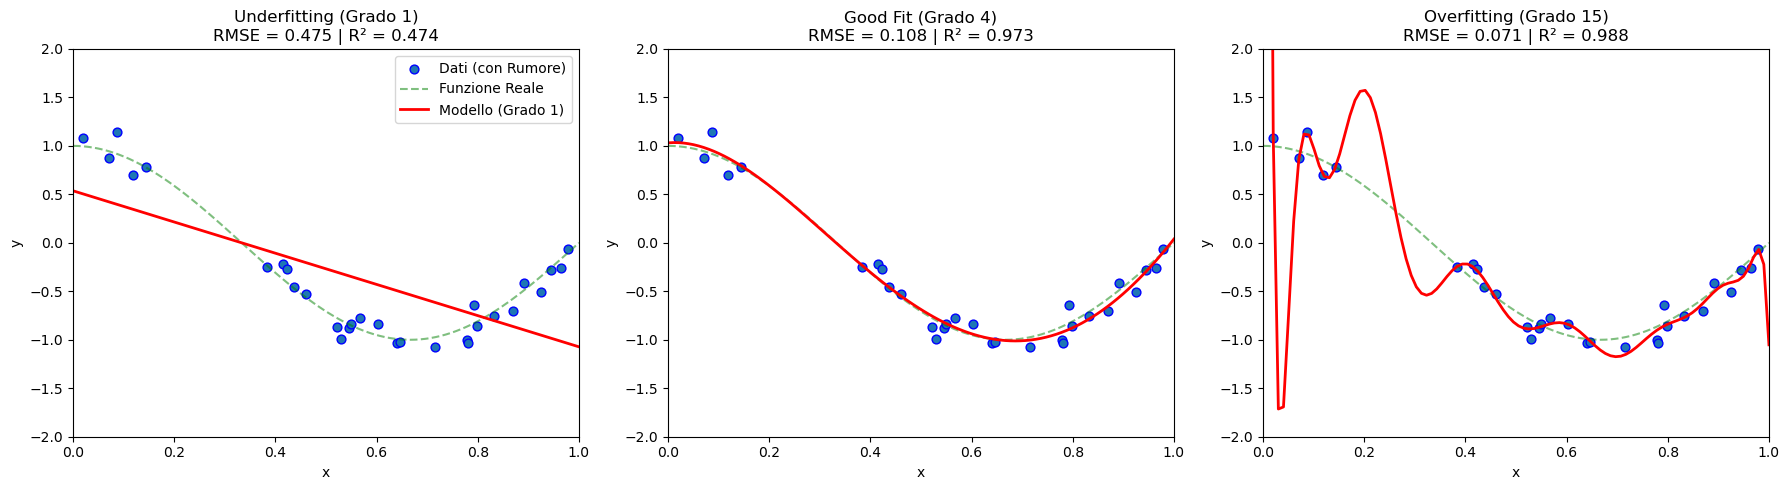

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# --- 1. Generazione Dati Sintetici (Non-Lineari) ---
np.random.seed(0)
n_samples = 30

# Funzione vera: coseno(1.5 * pi * x)
def true_fun(X):
    return np.cos(1.5 * np.pi * X)

X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1  # Aggiungiamo rumore (Noise)

# Reshape per scikit-learn
X = X[:, np.newaxis]

# --- 2. Setup Esperimento ---
# Gradi del polinomio da testare
degrees = [1, 4, 15] 
titles = ['Underfitting (Grado 1)', 'Good Fit (Grado 4)', 'Overfitting (Grado 15)']

plt.figure(figsize=(18, 5))

for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    
    degree = degrees[i]
    
    # Creiamo una Pipeline: 
    # 1. Trasforma i dati aggiungendo potenze (x^1, x^2... x^degree)
    # 2. Applica Regressione Lineare su queste nuove feature
    polynomial_features = PolynomialFeatures(degree=degree, include_bias=False)
    linear_regression = LinearRegression()
    
    pipeline = Pipeline([
        ("polynomial_features", polynomial_features),
        ("linear_regression", linear_regression)
    ])
    
    # Addestramento
    pipeline.fit(X, y)
    
    # Predizione (sia sui punti di training che su una linea densa per il plot)
    y_pred = pipeline.predict(X)
    
    # Creiamo dati x continui per disegnare la curva del modello in modo fluido
    X_test = np.linspace(0, 1, 100)[:, np.newaxis]
    y_test_pred = pipeline.predict(X_test)
    
    # --- 3. Calcolo Metriche ---
    mse = mean_squared_error(y, y_pred)
    rmse = np.sqrt(mse)
    score = r2_score(y, y_pred) # R2 Score
    
    # --- 4. Plotting ---
    # Dati Reali (Punti)
    plt.scatter(X, y, edgecolor='b', s=40, label="Dati (con Rumore)")
    
    # Modello Reale (Curva tratteggiata verde - la verità nascosta)
    plt.plot(X_test, true_fun(X_test), label="Funzione Reale", color='green', linestyle='--', alpha=0.5)
    
    # Modello Predetto (Linea Rossa)
    plt.plot(X_test, y_test_pred, label=f"Modello (Grado {degree})", color='red', linewidth=2)
    
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    
    # Titolo con Metriche
    plt.title(f"{titles[i]}\nRMSE = {rmse:.3f} | R² = {score:.3f}")
    
    if i == 0:
        plt.legend(loc="best")

plt.tight_layout()
plt.show()

# Modulo 2 - Lezione 1: La Regressione Lineare e il Motore del Gradiente

## 1\. Il Modello Matematico: L'Iperpiano

Tutti ricordiamo la retta dalle scuole medie: $y = mx + q$.
Nel Machine Learning, generalizziamo questo concetto per $n$ dimensioni (feature).

Se vogliamo predire il prezzo di una casa ($y$) basandoci su $n$ caratteristiche ($x_1, x_2, ..., x_n$), il nostro modello è una combinazione lineare pesata:

$$\hat{y} = w_1 x_1 + w_2 x_2 + ... + w_n x_n + b$$

In notazione vettoriale (quella che usano le GPU), questo è un **prodotto scalare**:

$$\hat{y} = \mathbf{w} \cdot \mathbf{x} + b$$

  * $\mathbf{w}$ (Weights/Pesi): Quanto è importante ogni feature? (Es. i mq pesano più del numero di finestre).
  * $b$ (Bias): L'intercetta. Qual è il prezzo base se tutte le feature fossero zero?
  * Geometria: In 2D è una retta. In 3D è un piano. In $n$ dimensioni è un **Iperpiano**.


-----

## 2\. La Funzione di Costo (Loss Function): L'Obiettivo

Come facciamo a trovare i $w$ e $b$ migliori? Dobbiamo definire matematicamente cosa significa "sbagliare".

Usiamo il **Mean Squared Error (MSE)**. Calcoliamo la distanza tra la nostra previsione ($\hat{y}$) e la realtà ($y$), la eleviamo al quadrato e ne facciamo la media.

$$J(\mathbf{w}, b) = \frac{1}{n} \sum_{i=1}^{n} (y^{(i)} - \hat{y}^{(i)})^2$$

**Perché al quadrato?**

1.  **Penalizza i grandi errori:** Sbagliare di 10 costa 100, sbagliare di 1 costa 1. Il modello è terrorizzato dagli errori grossolani.
2.  **È Convessa:** Questa è la proprietà chiave. La funzione MSE disegna nello spazio dei parametri una forma a **"ciotola" (o paraboloide)**.
      * Significa che non ci sono minimi locali "falsi". C'è solo un punto di minimo assoluto globale. Se scendiamo, arriveremo per forza alla soluzione ottima.

-----

## 3\. Ottimizzazione: Come troviamo il minimo?

Abbiamo due strade per trovare il fondo della ciotola (i valori ottimali di $w$ e $b$).

### Strada A: La Soluzione Analitica (Normal Equation)

È possibile usare l'algebra lineare pura per calcolare il minimo in un colpo solo, senza iterazioni:
$$\mathbf{w} = (X^T X)^{-1} X^T y$$

  * **Pro:** Risultato esatto immediato. È quello che usa `LinearRegression` di Scikit-Learn di default.
  * **Contro:** Richiede l'inversione di una matrice $(X^T X)$. La complessità computazionale è circa $O(n^3)$. Se avete 100.000 feature, il computer esplode. Non si usa nel Deep Learning.



### Strada B: Gradient Descent (La Discesa del Gradiente)

Questa è la base di tutte le Reti Neurali. È un approccio iterativo.

**L'Analogia dell'Escursionista Cieco:**
Sei su una montagna di notte (la funzione di costo) e vuoi scendere a valle (errore zero). Non vedi nulla. Cosa fai?

1.  Tasti il terreno con i piedi per sentire la pendenza.
2.  Fai un passo nella direzione dove la discesa è più ripida.
3.  Ripeti finché il terreno non diventa piatto.

**La Matematica del Gradiente:**
Il "tastare il terreno" matematicamente è il calcolo delle **Derivate Parziali** della funzione di costo rispetto ai pesi. Il gradiente ($\nabla J$) è un vettore che punta sempre verso la salita più ripida. Noi andiamo nella direzione opposta (segno meno).

L'aggiornamento dei pesi ad ogni passo è:
$$w_{nuovo} = w_{vecchio} - \eta \cdot \frac{\partial J}{\partial w}$$

Dove $\eta$ (Eta) è il **Learning Rate**: la lunghezza del passo.

  * $\eta$ troppo piccolo: Scendi troppo lentamente (ci metti anni).
  * $\eta$ troppo grande: Salti oltre il minimo e potresti addirittura risalire dall'altra parte (divergenza).

-----

## 4\. Laboratorio Python: Visualizzare la Discesa del Gradiente

Per capire davvero, dobbiamo vederlo. Creeremo un grafico 3D della Loss Function e vedremo il modello "imparare" scendendo lungo la superficie.

*Nota didattica: In questo codice simuliamo il processo manuale che Scikit-Learn nasconde, per scopi educativi.*




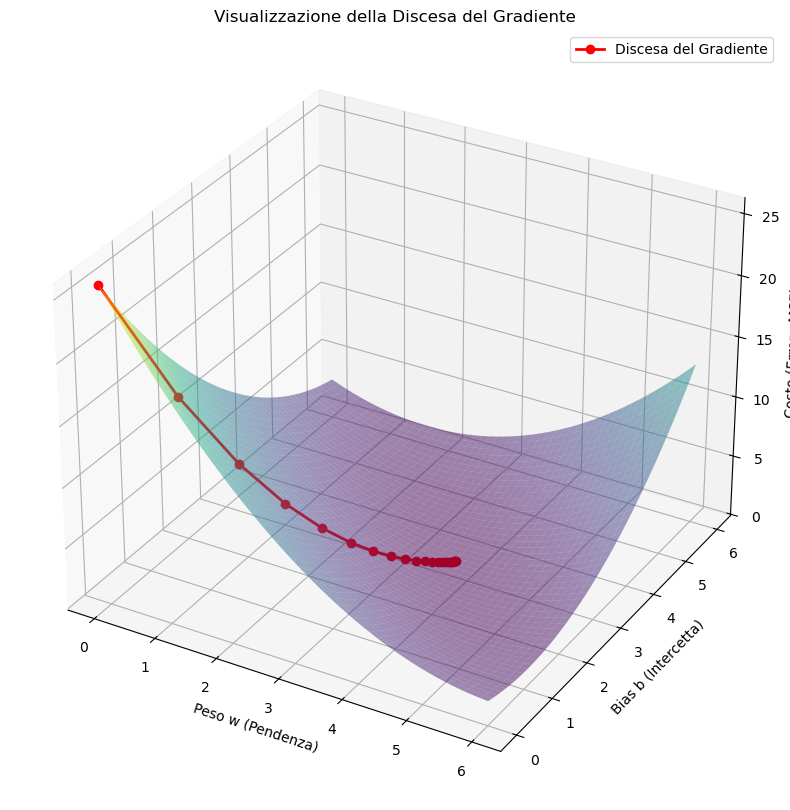

Parametri finali trovati: w=3.69, b=3.23
Parametri reali: w=4, b=3


In [9]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# --- 1. Generazione Dati Sintetici ---
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
true_w = 4
true_b = 3
# y = 4x + 3 + rumore gaussiano
y = true_b + true_w * X + np.random.randn(100, 1)

# --- 2. Definizione Loss Function e Gradiente ---
def compute_cost(w, b, X, y):
    m = len(y)
    predictions = X.dot(w) + b
    cost = (1/(2*m)) * np.sum(np.square(predictions - y))
    return cost

def gradient_descent_step(w, b, X, y, learning_rate):
    m = len(y)
    predictions = X.dot(w) + b
    # Calcolo derivate parziali
    dw = (1/m) * np.sum((predictions - y) * X)
    db = (1/m) * np.sum(predictions - y)
    # Aggiornamento parametri
    w = w - learning_rate * dw
    b = b - learning_rate * db
    return w, b

# --- 3. Training Loop (La "Discesa") ---
w_start = 0.0 # Partiamo da pesi sbagliati
b_start = 0.0
learning_rate = 0.1
iterations = 20

w_history = [w_start]
b_history = [b_start]
cost_history = [compute_cost(w_start, b_start, X, y)]

w = w_start
b = b_start

for i in range(iterations):
    w, b = gradient_descent_step(w, b, X, y, learning_rate)
    w_history.append(w)
    b_history.append(b)
    cost_history.append(compute_cost(w, b, X, y))

# --- 4. Visualizzazione 3D della Loss Surface ---
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Creiamo una griglia di valori possibili per w e b
w_vals = np.linspace(0, 6, 50)
b_vals = np.linspace(0, 6, 50)
W_grid, B_grid = np.meshgrid(w_vals, b_vals)
Cost_grid = np.zeros_like(W_grid)

# Calcoliamo il costo per ogni combinazione nella griglia
for i in range(len(w_vals)):
    for j in range(len(b_vals)):
        Cost_grid[j, i] = compute_cost(W_grid[j, i], B_grid[j, i], X, y)

# Plot della superficie (La "Ciotola")
ax.plot_surface(W_grid, B_grid, Cost_grid, alpha=0.5, cmap='viridis')

# Plot del percorso di apprendimento
ax.plot(w_history, b_history, cost_history, color='red', marker='o', linewidth=2, label='Discesa del Gradiente')

ax.set_xlabel('Peso w (Pendenza)')
ax.set_ylabel('Bias b (Intercetta)')
ax.set_zlabel('Costo (Errore MSE)')
ax.set_title('Visualizzazione della Discesa del Gradiente')
ax.legend()

plt.show()

print(f"Parametri finali trovati: w={w:.2f}, b={b:.2f}")
print(f"Parametri reali: w={true_w}, b={true_b}")

**Cosa osservare nel grafico:**

  * La superficie colorata è la **Loss Function**. Il punto più basso (blu scuro) rappresenta l'errore minimo.
  * I pallini rossi sono i passi dell'algoritmo.
  * Notate come all'inizio i passi sono lunghi (la pendenza è ripida, quindi il gradiente è alto), mentre avvicinandosi al minimo i passi diventano piccolissimi. **L'algoritmo rallenta naturalmente man mano che si avvicina alla soluzione.**

-----

## 5\. Pratica Industriale: Scikit-Learn

In azienda non scriviamo il gradiente a mano (a meno che non stiamo creando un'architettura custom). Usiamo Scikit-Learn.

Attenzione:

  * `LinearRegression`: Usa la **Soluzione Analitica** (OLS). È perfetto per dataset piccoli/medi (fino a 100k righe).
  * `SGDRegressor`: Usa lo **Stochastic Gradient Descent**. È obbligatorio per dataset enormi (milioni di righe) o streaming data, perché non deve caricare tutta la matrice in memoria per invertirla.

<!-- end list -->

Dimensioni X: (20640, 1)
Dimensioni y: (20640,)

--- Parametri del Modello ---
L'equazione appresa è: Prezzo = 0.42 * Reddito + 0.44
Interpretazione: Per ogni aumento di 1 punto nel reddito, il prezzo sale di 0.42 (x $100k)

--- Metriche di Performance ---
Mean Squared Error (MSE): 0.71
R2 Score: 0.46 (Spieghiamo circa il 45.9% della varianza dei prezzi)


/opt/anaconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


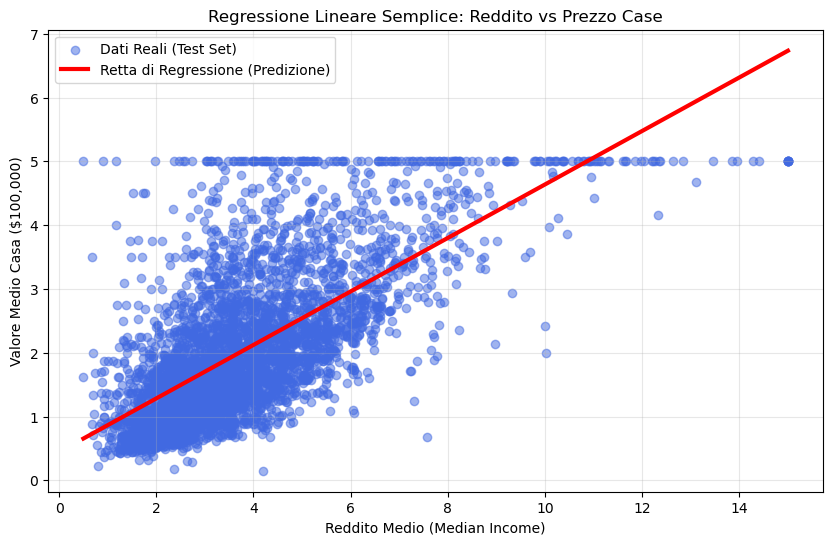

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# --- 1. Caricamento e Preparazione Dati ---
housing = fetch_california_housing(as_frame=True)
df = housing.frame

# Per una Regressione Semplice, selezioniamo UNA sola feature.
# X deve essere sempre una Matrice (2D array), anche se ha una sola colonna.
# y deve essere un Vettore (1D array).

X = df[['MedInc']]  # Doppia parentesi per mantenere il DataFrame (n_samples, 1)
y = df['MedHouseVal'] # Target: Valore mediano casa (in $100,000)

print(f"Dimensioni X: {X.shape}")
print(f"Dimensioni y: {y.shape}")

# --- 2. Train / Test Split ---
# Dividiamo i dati: 80% per imparare (Train), 20% per l'esame finale (Test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# --- 3. Addestramento del Modello (Fitting) ---
# Qui avviene la magia matematica (OLS)
model = LinearRegression()
model.fit(X_train, y_train)

# --- 4. Predizione ---
# Chiediamo al modello di stimare i prezzi per il set di test che non ha mai visto
y_pred = model.predict(X_test)

# --- 5. Analisi e Valutazione ---
# Coefficiente (w): Di quanto aumenta il prezzo per ogni unità di reddito in più?
coef = model.coef_[0]
intercept = model.intercept_

print(f"\n--- Parametri del Modello ---")
print(f"L'equazione appresa è: Prezzo = {coef:.2f} * Reddito + {intercept:.2f}")
print(f"Interpretazione: Per ogni aumento di 1 punto nel reddito, il prezzo sale di {coef:.2f} (x $100k)")

# Metriche
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\n--- Metriche di Performance ---")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R2 Score: {r2:.2f} (Spieghiamo circa il {r2*100:.1f}% della varianza dei prezzi)")

# --- 6. Visualizzazione ---
plt.figure(figsize=(10, 6))

# Disegniamo i dati reali del Test Set (puntini blu)
plt.scatter(X_test, y_test, color='royalblue', alpha=0.5, label='Dati Reali (Test Set)')

# Disegniamo la retta di regressione (linea rossa)
# Essendo una retta, basta prendere il min e max di X e predire i loro y
x_range = np.linspace(X_test.min(), X_test.max(), 100).reshape(-1, 1)
y_range_pred = model.predict(x_range)
plt.plot(x_range, y_range_pred, color='red', linewidth=3, label='Retta di Regressione (Predizione)')

plt.title('Regressione Lineare Semplice: Reddito vs Prezzo Case')
plt.xlabel('Reddito Medio (Median Income)')
plt.ylabel('Valore Medio Casa ($100,000)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()



### Concetto: Dalla Retta al Piano

Quando avevamo una sola feature ($x_1$), cercavamo una retta:
$$y = w_1 x_1 + b$$

Ora che usiamo due feature ($x_1$ = Reddito, $x_2$ = Età della Casa), cerchiamo un **piano** nello spazio tridimensionale:
$$y = w_1 x_1 + w_2 x_2 + b$$

  * **$w_1$ (Peso Reddito):** La pendenza del piano lungo l'asse del reddito.
  * **$w_2$ (Peso Età):** La pendenza lungo l'asse dell'età.
  * **$b$ (Intercetta):** L'altezza del piano quando reddito ed età sono zero.

### Esercizio Python: Regressione a 2 Variabili con Plot 3D

Useremo `MedInc` (Reddito) e `HouseAge` (Età della casa) per predire il prezzo.

Dimensioni X: (20640, 2) (Notare le 2 colonne)

--- Performance del Modello ---
MSE: 0.66
R2 Score: 0.49 (Migliorato rispetto al 0.47 di prima?)

--- L'Equazione del Piano ---
Prezzo = (0.43 * Reddito) + (0.02 * Età) + -0.11
Interpretazione: A parità di età, se il reddito sale di 1, il prezzo sale di 0.43
Interpretazione: A parità di reddito, se la casa invecchia di 1 anno, il prezzo sale di 0.02


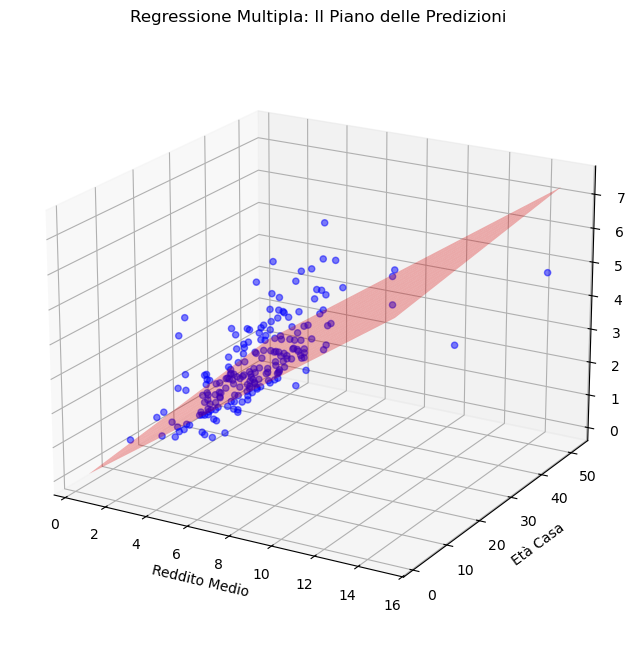

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Import necessario per il 3D
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# --- 1. Preparazione Dati (2 Feature) ---
housing = fetch_california_housing(as_frame=True)
df = housing.frame

# Selezioniamo DUE feature: Reddito Medio e Età della Casa
feature_cols = ['MedInc', 'HouseAge']
X = df[feature_cols]
y = df['MedHouseVal']

print(f"Dimensioni X: {X.shape} (Notare le 2 colonne)")

# --- 2. Train / Test Split ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# --- 3. Training ---
# NOTA DIDATTICA: La sintassi è IDENTICA al caso a 1 feature.
# Scikit-Learn gestisce matrici di qualsiasi dimensione (n, m).
model = LinearRegression()
model.fit(X_train, y_train)

# --- 4. Predizione e Metriche ---
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\n--- Performance del Modello ---")
print(f"MSE: {mse:.2f}")
print(f"R2 Score: {r2:.2f} (Migliorato rispetto al 0.47 di prima?)")

# Analisi dei coefficienti
w_income = model.coef_[0]
w_age = model.coef_[1]
b = model.intercept_

print(f"\n--- L'Equazione del Piano ---")
print(f"Prezzo = ({w_income:.2f} * Reddito) + ({w_age:.2f} * Età) + {b:.2f}")
print("Interpretazione: A parità di età, se il reddito sale di 1, il prezzo sale di", f"{w_income:.2f}")
print("Interpretazione: A parità di reddito, se la casa invecchia di 1 anno, il prezzo sale di", f"{w_age:.2f}")


# --- 5. Visualizzazione 3D (Il "Wow" factor) ---
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# A. Scatter plot dei dati reali (ne prendiamo solo un campione per non appesantire il grafico)
# Prendiamo i primi 200 punti del test set
sample_size = 200
ax.scatter(X_test.iloc[:sample_size]['MedInc'], 
           X_test.iloc[:sample_size]['HouseAge'], 
           y_test.iloc[:sample_size], 
           c='blue', marker='o', alpha=0.5, label='Dati Reali')

# B. Disegnare il Piano di Regressione
# Creiamo una griglia di coordinate x1 (Reddito) e x2 (Età)
x1_range = np.linspace(X_test['MedInc'].min(), X_test['MedInc'].max(), 20)
x2_range = np.linspace(X_test['HouseAge'].min(), X_test['HouseAge'].max(), 20)
x1_mesh, x2_mesh = np.meshgrid(x1_range, x2_range)

# Calcoliamo la Z (Prezzo predetto) per ogni punto della griglia
# Equazione: y = w1*x1 + w2*x2 + b
y_mesh_pred = w_income * x1_mesh + w_age * x2_mesh + b

# Plot della superficie
ax.plot_surface(x1_mesh, x2_mesh, y_mesh_pred, color='red', alpha=0.3)

# Label degli assi
ax.set_xlabel('Reddito Medio')
ax.set_ylabel('Età Casa')
ax.set_zlabel('Prezzo Casa ($100k)')
ax.set_title('Regressione Multipla: Il Piano delle Predizioni')

# Angolazione della camera per vedere meglio la pendenza
ax.view_init(elev=20, azim=-60)

plt.show()




# Modulo 2 - Lezione 3: La Regressione Polinomiale (Il "Trucco" delle Feature)

## 1\. Il Concetto Matematico

Finora abbiamo assunto che i dati seguissero una retta:
$$y = w_1 x + b$$

Ma se i dati hanno una forma curva (parabolica), la relazione potrebbe essere:
$$y = w_1 x + w_2 x^2 + b$$

A prima vista sembra una funzione non-lineare. Ma guardate cosa succede se facciamo una sostituzione.
Poniamo $a = x$ e $z = x^2$. L'equazione diventa:
$$y = w_1 a + w_2 z + b$$

**Magia:** Questa è un'equazione **Lineare** (una somma pesata) rispetto alle nuove variabili $a$ e $z$.
Questo significa che possiamo ancora usare la nostra fidata `LinearRegression` (che risolve con i minimi quadrati), a patto di "ingannarla" passandole $x^2$ come se fosse una feature completamente nuova.

## 2\. Lo Strumento: `PolynomialFeatures`

In Scikit-Learn, usiamo il trasformatore `PolynomialFeatures`.
Questo strumento prende la matrice originale $X$ e aggiunge colonne calcolando le potenze e le interazioni.

Se abbiamo 2 feature $[x_1, x_2]$ e chiediamo `degree=2`, lui genererà:
$$[1, x_1, x_2, x_1^2, x_1 x_2, x_2^2]$$

## 3\. Laboratorio Python: Da Retta a Curva

In questo esempio mostreremo la differenza tra trattare i dati come lineari e trasformarli.





--- Modello Lineare Semplice ---
R2 Score: 0.426 (Pessimo, non cattura la curva)

Shape originale X: (100, 1)
Shape trasformata X_poly: (100, 2)
Esempio prima riga trasformata [x, x^2]: [-0.75275929  0.56664654]

--- Modello Polinomiale (Grado 2) ---
R2 Score: 0.853 (Ottimo fit)
Intercept (Bias): 1.78 (Vero=2)
Coefficienti [x, x^2]: [0.93366893 0.56456263] (Vero=[1, 0.5])


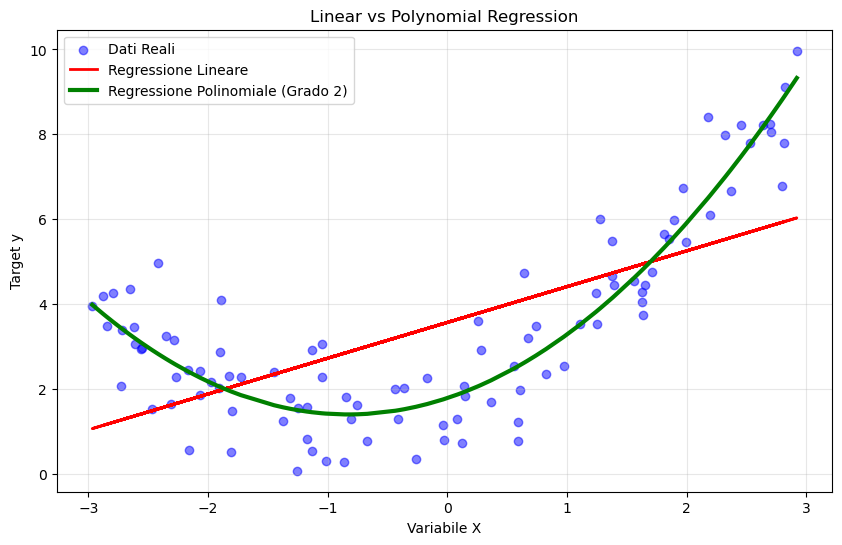

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

# --- 1. Generiamo dati parabolici con rumore ---
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3  # X tra -3 e 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)  # y = 0.5x^2 + x + 2 + Rumore

# --- 2. Tentativo 1: Regressione Lineare Pura (Fallimento) ---
lin_reg = LinearRegression()
lin_reg.fit(X, y)
y_pred_lin = lin_reg.predict(X)

print("--- Modello Lineare Semplice ---")
print(f"R2 Score: {r2_score(y, y_pred_lin):.3f} (Pessimo, non cattura la curva)")

# --- 3. Tentativo 2: Regressione Polinomiale (Il Trucco) ---
# Trasformiamo la X singola in [X, X^2]
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

print(f"\nShape originale X: {X.shape}")
print(f"Shape trasformata X_poly: {X_poly.shape}")
print(f"Esempio prima riga trasformata [x, x^2]: {X_poly[0]}")

# Ora usiamo la Regressione Lineare sulla matrice trasformata!
poly_reg = LinearRegression()
poly_reg.fit(X_poly, y)
y_pred_poly = poly_reg.predict(X_poly)

print("\n--- Modello Polinomiale (Grado 2) ---")
print(f"R2 Score: {r2_score(y, y_pred_poly):.3f} (Ottimo fit)")
print(f"Intercept (Bias): {poly_reg.intercept_[0]:.2f} (Vero=2)")
print(f"Coefficienti [x, x^2]: {poly_reg.coef_[0]} (Vero=[1, 0.5])")

# --- 4. Visualizzazione ---
plt.figure(figsize=(10, 6))

# Dati reali
plt.scatter(X, y, color='blue', alpha=0.5, label='Dati Reali')

# Modello Lineare (Rosso)
plt.plot(X, y_pred_lin, color='red', linewidth=2, label='Regressione Lineare')

# Modello Polinomiale (Verde)
# IMPORTANTE: Per disegnare una curva ordinata, dobbiamo ordinare le X
X_sorted_idx = np.argsort(X.flatten())
X_sorted = X[X_sorted_idx]
y_poly_sorted = y_pred_poly[X_sorted_idx]

plt.plot(X_sorted, y_poly_sorted, color='green', linewidth=3, label='Regressione Polinomiale (Grado 2)')

plt.title('Linear vs Polynomial Regression')
plt.xlabel('Variabile X')
plt.ylabel('Target y')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

### Analisi dei Risultati 

1.  **Guardate l'R2:** Il modello lineare si ferma a un punteggio basso perché cerca di far passare una retta attraverso una parabola. Il modello polinomiale raggiunge un punteggio alto perché la forma geometrica coincide con la generazione dei dati.
2.  **I Coefficienti:** Guardate l'output del codice.
      * L'equazione vera era $y = 0.5x^2 + 1x + 2$.
      * Il modello ha trovato coefficienti molto vicini (es. `0.48`, `0.98`, `2.1`).
      * Questo dimostra che il modello ha "scoperto" la legge fisica che ha generato i dati.


### Attenzione: La Maledizione della Dimensionalità

Una nota di cautela per gli studenti:

  * Se usate `degree=3` su 1 feature, aggiungete 2 colonne. Facile.
  * Se avete 100 feature originali e usate `degree=3`, `PolynomialFeatures` genererà tutte le combinazioni possibili ($x_1^2, x_1x_2, x_1x_3...$).
  * Il numero di feature esplode (combinatoria). Con 100 feature e grado 2, otteniamo circa 5000 colonne. Il modello diventerà lentissimo e andrà quasi sicuramente in **Overfitting**.
  * *Soluzione:* Usare polinomi solo su poche feature selezionate o usare tecniche di **Regolarizzazione** (che vedremo subito dopo).



# Modulo 2 - Lezione 4: La Regolarizzazione (Ridge, Lasso, ElasticNet)

## 1\. Il Problema: La "Libertà" dei Coefficienti

Ricordate il polinomio di grado 15 che oscillava selvaggiamente?
Matematicamente, per creare quelle curve estreme, il modello è costretto a scegliere pesi ($w$) enormi.
Esempio: $y = 5000x^{15} - 4950x^{14} + ...$

Questi numeri grandi si cancellano a vicenda per inseguire il rumore.
**Intuizione:** Un modello con pesi piccoli è un modello più stabile e semplice. Se i pesi sono vicini a zero, le feature contano poco, e la funzione è più "piatta".

## 2\. La Soluzione Matematica: Cambiare la Loss Function

Modifichiamo la funzione che il gradiente deve minimizzare. Aggiungiamo una **penalità** basata sulla grandezza dei pesi.

$$J(\mathbf{w}) = \text{MSE} + \alpha \cdot \text{Penalità}$$

Dove $\alpha$ (Alpha) è un iperparametro che controlla quanto vogliamo essere severi.

  * $\alpha = 0$: Torniamo alla Regressione Lineare classica.
  * $\alpha \to \infty$: I pesi vengono forzati a zero (il modello diventa una linea piatta $y=b$).

Esistono due modi per calcolare questa penalità:

### A. Ridge Regression (Regolarizzazione L2)

La penalità è la somma dei quadrati dei pesi (Norma Euclidea).

$$J(\mathbf{w}) = \text{MSE} + \alpha \sum_{j=1}^{n} w_j^2$$

  * **Effetto:** Tende a rendere i coefficienti *piccoli*, ma mai esattamente zero.
  * **Quando usarla:** Quando tutte le feature sono utili e vogliamo evitare che una domini sulle altre (ottima contro la multicollinearità).

### B. Lasso Regression (Regolarizzazione L1)

La penalità è la somma dei valori assoluti dei pesi (Norma di Manhattan).

$$J(\mathbf{w}) = \text{MSE} + \alpha \sum_{j=1}^{n} |w_j|$$

  * **Effetto Magico:** Tende a forzare i coefficienti delle feature inutili a **ESATTAMENTE ZERO**.
  * **Conseguenza:** Fa **Feature Selection Automatica**. Se date a Lasso 100 colonne di cui 90 sono spazzatura, lui metterà a zero i pesi delle 90 colonne spazzatura.

### C. ElasticNet

È semplicemente una combinazione delle due:
$$J(\mathbf{w}) = \text{MSE} + r \cdot L1 + (1-r) \cdot L2$$
Si usa quando non siamo sicuri quale scegliere.

-----

## 3\. Laboratorio Python: Feature Selection con Lasso

In questo esperimento simuleremo una situazione aziendale comune: abbiamo tante colonne di dati, ma solo poche sono importanti per il business. Vedremo come la Regressione Lineare fallisce (overfitting) e Lasso ci salva "spegnendo" il rumore.

**Requisito Fondamentale:** La Regolarizzazione richiede **Dati Scalati**. Se una feature varia da 0 a 1000 e l'altra da 0 a 1, la penalità colpirà ingiustamente quella grande.





Scenario: Abbiamo 20 feature, ma solo 3 influenzano davvero il target.


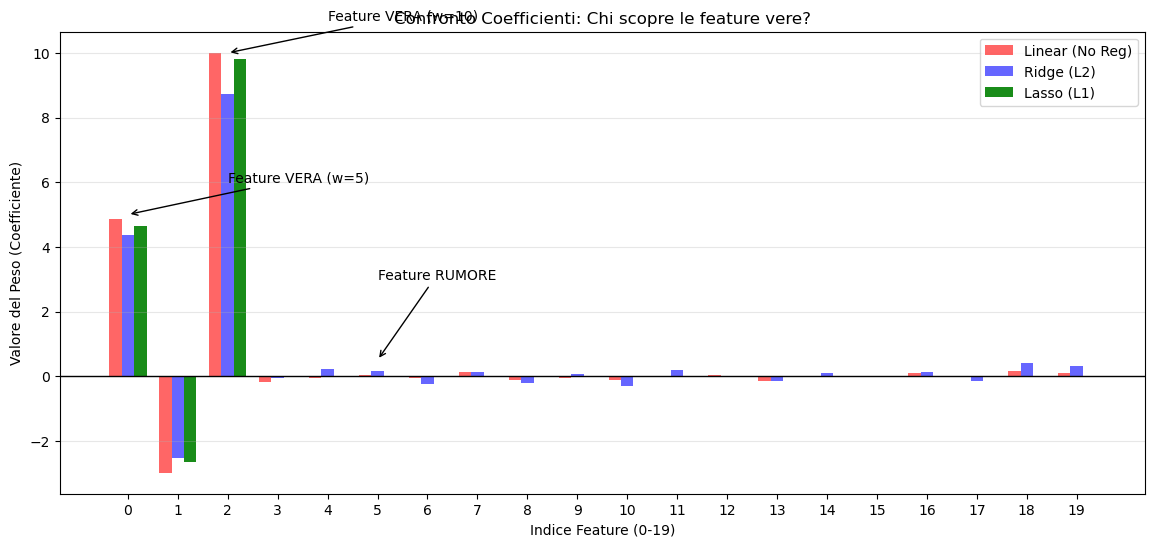


--- Analisi Sparsità Lasso ---
La Regressione Lineare ha usato 20 feature su 20.
Lasso ha azzerato 17 feature su 20.
Feature rimaste attive con Lasso: [0 1 2]


In [15]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# --- 1. Generazione Dati con "Rumore" ---
np.random.seed(42)
n_samples = 100
n_features = 20

# Creiamo una matrice di numeri casuali (100 righe, 20 colonne)
X = np.random.randn(n_samples, n_features)

# Definiamo i pesi "veri": Solo le prime 3 feature contano davvero!
true_w = np.zeros(n_features)
true_w[0] = 5  # Feature 0 importante
true_w[1] = -3 # Feature 1 importante
true_w[2] = 10 # Feature 2 molto importante
# Le altre 17 feature hanno peso 0 (sono rumore inutile)

# Generiamo y = X * w + errore
y = np.dot(X, true_w) + np.random.randn(n_samples) # Aggiungiamo rumore bianco

print("Scenario: Abbiamo 20 feature, ma solo 3 influenzano davvero il target.")

# --- 2. Preparazione ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Nota: StandardScaler non è opzionale qui, è obbligatorio per Ridge/Lasso.
# Tuttavia, avendo generato i dati con randn, sono già scalati. Lo mettiamo per correttezza formale.

# --- 3. Addestramento dei 3 Modelli ---

# A. Regressione Lineare Classica (Nessuna penalità)
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# B. Ridge (L2) - Alpha basso
ridge_reg = Ridge(alpha=10)
ridge_reg.fit(X_train, y_train)

# C. Lasso (L1) - Alpha basso
lasso_reg = Lasso(alpha=0.3)
lasso_reg.fit(X_train, y_train)

# --- 4. Visualizzazione dei Coefficienti Appresi ---
plt.figure(figsize=(14, 6))

feature_idx = np.arange(n_features)
bar_width = 0.25

# Plot Linear
plt.bar(feature_idx - bar_width, lin_reg.coef_, width=bar_width, label='Linear (No Reg)', color='red', alpha=0.6)

# Plot Ridge
plt.bar(feature_idx, ridge_reg.coef_, width=bar_width, label='Ridge (L2)', color='blue', alpha=0.6)

# Plot Lasso
plt.bar(feature_idx + bar_width, lasso_reg.coef_, width=bar_width, label='Lasso (L1)', color='green', alpha=0.9)

plt.axhline(0, color='black', linewidth=1)
plt.title("Confronto Coefficienti: Chi scopre le feature vere?")
plt.xlabel("Indice Feature (0-19)")
plt.ylabel("Valore del Peso (Coefficiente)")
plt.xticks(feature_idx)
plt.legend()
plt.grid(axis='y', alpha=0.3)

# Evidenziamo le feature vere
plt.annotate('Feature VERA (w=5)', xy=(0, 5), xytext=(2, 6), arrowprops=dict(facecolor='black', arrowstyle='->'))
plt.annotate('Feature VERA (w=10)', xy=(2, 10), xytext=(4, 11), arrowprops=dict(facecolor='black', arrowstyle='->'))
plt.annotate('Feature RUMORE', xy=(5, 0.5), xytext=(5, 3), arrowprops=dict(facecolor='black', arrowstyle='->'))

plt.show()

# --- 5. Verifica "Numerica" dello Zeroing di Lasso ---
print("\n--- Analisi Sparsità Lasso ---")
zero_features = np.sum(lasso_reg.coef_ == 0)
print(f"La Regressione Lineare ha usato {np.sum(lin_reg.coef_ != 0)} feature su 20.")
print(f"Lasso ha azzerato {zero_features} feature su 20.")
print(f"Feature rimaste attive con Lasso: {np.where(lasso_reg.coef_ != 0)[0]}")

### Spiegazione del Grafico e dei Risultati

1.  **Barre Rosse (Linear Regression):**
    Guardate le feature dalla 3 alla 19 (quelle che dovrebbero essere zero). Le barre rosse non sono zero\! Il modello sta trovando pattern nel rumore casuale (Overfitting). Pensa che la feature 15 sia importante quanto la feature 1.
2.  **Barre Blu (Ridge):**
    Le barre blu nelle zone di rumore sono più basse delle rosse. Ridge le ha "schiacciate", riducendo l'errore, ma non le ha eliminate.
3.  **Barre Verdi (Lasso):**
    Guardate le feature di rumore (3-19). **Sono sparite.** Lasso le ha messe esattamente a zero.
    Ha tenuto solo le feature 0, 1 e 2 (quelle vere).
      * **Impatto Business:** Se queste feature fossero sensori costosi in una fabbrica, Lasso vi starebbe dicendo: "Puoi smettere di pagare per mantenere i sensori dal 3 al 19, sono inutili".

-----

### Approfondimento: La Geometria (Perché Lasso azzera?)

Domanda da colloquio tecnico: *Perché L1 azzera e L2 no?*

Immaginate di guardare la funzione dall'alto (curve di livello).

  * Cerchiamo il punto dove l'errore (MSE) tocca la zona di penalità permessa.
  * **Ridge (L2):** La zona permessa è un **cerchio**. Le ellissi dell'errore toccano il cerchio quasi sempre in un punto generico sulla curva, mai esattamente sugli assi.
  * **Lasso (L1):** La zona permessa è un **rombo (o quadrato ruotato)**. Le punte del rombo sono sugli assi. Geometricamente, è molto probabile che l'ellisse dell'errore tocchi il rombo proprio su una **punta** (un angolo).
  * Essere su una punta significa che una coordinata è zero.

### Sintesi Lezione

  * Se il modello fa Overfitting $\rightarrow$ Usa Regolarizzazione.
  * Se sospetti di avere feature inutili $\rightarrow$ Usa **Lasso**.
  * Se le feature sono correlate tra loro $\rightarrow$ Usa **Ridge**.
  * Se non sai cosa fare $\rightarrow$ Usa **ElasticNet**.
  * **MAI** dimenticare `StandardScaler` prima di regolarizzare\!


--- 1. Caricamento Dati ---
Train Set: (16512, 8)
Test Set:  (4128, 8)

--- 2. Espansione Polinomiale ---
Nuove dimensioni Train (Feature esplose): (16512, 44)

--- 3. Standardizzazione (Z-Score) ---

--- 4. Addestramento Modelli ---


c:\Users\mbagn\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.275e+00, tolerance: 2.207e+00
  model = cd_fast.enet_coordinate_descent(



--- 5. Risultati sul Test Set ---
[Linear OLS] RMSE: 0.6814 | R2: 0.6457
[Ridge Regr.] RMSE: 0.7541 | R2: 0.5660
Miglioramento Ridge su OLS: -10.68% (Se positivo, Ridge ha ridotto l'errore)


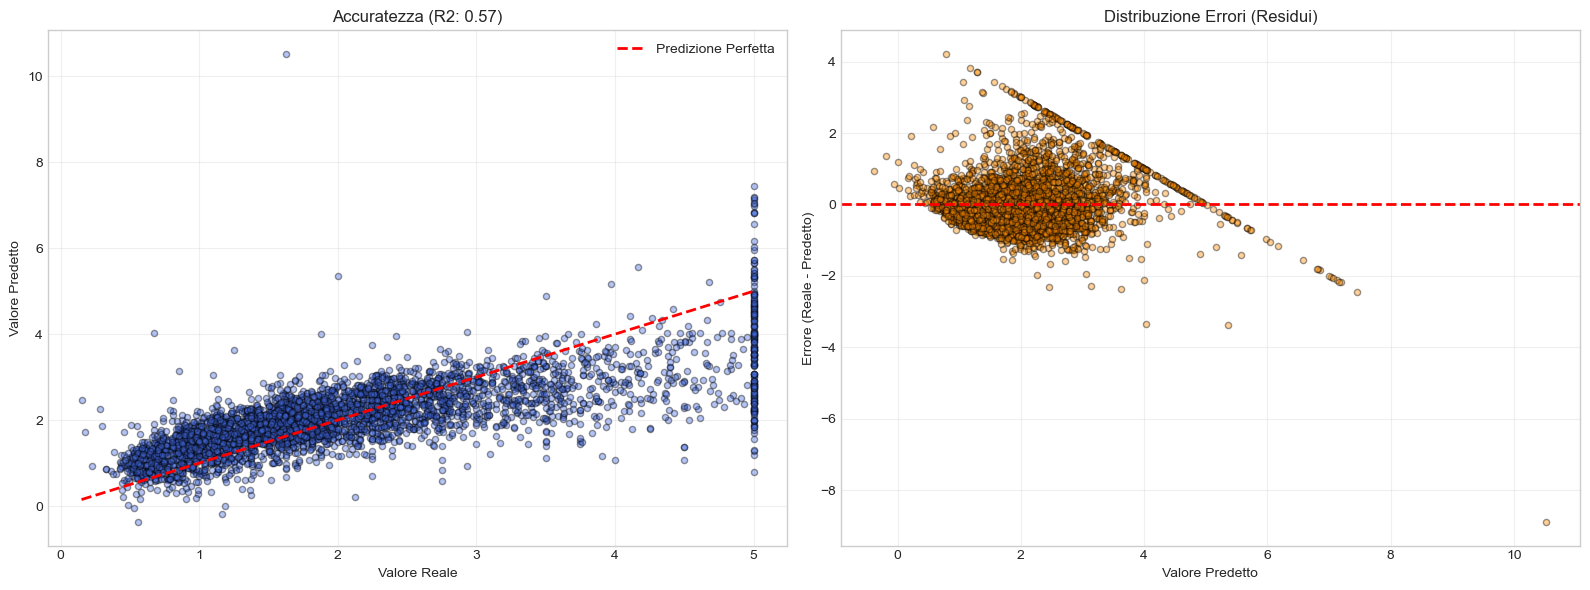


--- Analisi Pesi (Top 5 Feature più influenti) ---
             Feature      Peso  Abs_Peso
15  MedInc Longitude -0.543381  0.543381
7          Longitude -0.522438  0.522438
6           Latitude -0.447886  0.447886
41        Latitude^2 -0.214957  0.214957
9    MedInc HouseAge  0.144692  0.144692


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Strumenti Scikit-Learn (Solo quelli studiati finora)
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Configurazione grafica
plt.style.use('seaborn-v0_8-whitegrid')

# ------------------------------------------------------------------------------
# FASE 1: Caricamento e Split Iniziale
# ------------------------------------------------------------------------------
print("--- 1. Caricamento Dati ---")
data = fetch_california_housing(as_frame=True)
df = data.frame
X = df.drop("MedHouseVal", axis=1)
y = df["MedHouseVal"]

# SPLIT PRIMA DI TUTTO! 
# Regola d'oro: Non guardare mai il Test Set durante il preprocessing.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Train Set: {X_train.shape}")
print(f"Test Set:  {X_test.shape}")

# ------------------------------------------------------------------------------
# FASE 2: Feature Engineering (Polinomi)
# ------------------------------------------------------------------------------
# Vogliamo catturare curve, non solo rette. Usiamo il grado 2.
# Nota: include_bias=False perché l'intercetta la calcola già il modello dopo.
print("\n--- 2. Espansione Polinomiale ---")
poly = PolynomialFeatures(degree=2, include_bias=False)

# FIT solo su TRAIN
X_train_poly = poly.fit_transform(X_train)

# TRANSFORM su TEST (Usiamo le regole imparate dal Train)
X_test_poly = poly.transform(X_test)

print(f"Nuove dimensioni Train (Feature esplose): {X_train_poly.shape}")
# Da 8 feature siamo passati a 44 (quadrati e interazioni tra tutte le colonne)

# ------------------------------------------------------------------------------
# FASE 3: Scaling (Standardizzazione)
# ------------------------------------------------------------------------------
# Fondamentale per Ridge: se abbiamo x e x^2, x^2 sarà enorme. Dobbiamo scalarli.
print("\n--- 3. Standardizzazione (Z-Score) ---")
scaler = StandardScaler()

# FIT solo su TRAIN (Calcola media e deviazione standard del train)
X_train_scaled = scaler.fit_transform(X_train_poly)

# TRANSFORM su TEST (Usa media e dev. std. del TRAIN per scalare il test)
# Se facessimo fit sul test, sarebbe Data Leakage!
X_test_scaled = scaler.transform(X_test_poly)

# ------------------------------------------------------------------------------
# FASE 4: Modellazione (Confronto Lineare vs Ridge)
# ------------------------------------------------------------------------------
print("\n--- 4. Addestramento Modelli ---")

# --- Modello A: Regressione Lineare Semplice (Sui dati polinomiali) ---
# Rischio: Overfitting perché abbiamo 44 feature complesse e nessuna penalità.
model_linear = LinearRegression()
model_linear.fit(X_train_scaled, y_train)
y_pred_linear = model_linear.predict(X_test_scaled)

# --- Modello B: Ridge Regression (Regolarizzato) ---
# Soluzione: Penalizziamo i pesi troppo alti. 
# Alpha = 1.0 è un valore standard di partenza.
model_ridge = Lasso(alpha=0.02) 
model_ridge.fit(X_train_scaled, y_train)
y_pred_ridge = model_ridge.predict(X_test_scaled)

# ------------------------------------------------------------------------------
# FASE 5: Valutazione e Confronto
# ------------------------------------------------------------------------------
print("\n--- 5. Risultati sul Test Set ---")

# Metriche Modello Lineare (Senza freno)
rmse_lin = np.sqrt(mean_squared_error(y_test, y_pred_linear))
r2_lin = r2_score(y_test, y_pred_linear)
print(f"[Linear OLS] RMSE: {rmse_lin:.4f} | R2: {r2_lin:.4f}")

# Metriche Modello Ridge (Con freno)
rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
r2_ridge = r2_score(y_test, y_pred_ridge)
print(f"[Ridge Regr.] RMSE: {rmse_ridge:.4f} | R2: {r2_ridge:.4f}")

# Calcoliamo il miglioramento
improvement = (rmse_lin - rmse_ridge) / rmse_lin * 100
print(f"Miglioramento Ridge su OLS: {improvement:.2f}% (Se positivo, Ridge ha ridotto l'errore)")

# ------------------------------------------------------------------------------
# FASE 6: Diagnostica Visiva (Usiamo il modello Ridge vincente)
# ------------------------------------------------------------------------------
residuals = y_test - y_pred_ridge

fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# Grafico 1: Reale vs Predetto
axs[0].scatter(y_test, y_pred_ridge, alpha=0.4, color='royalblue', edgecolor='k', s=20)
axs[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Predizione Perfetta')
axs[0].set_title(f'Accuratezza (R2: {r2_ridge:.2f})')
axs[0].set_xlabel('Valore Reale')
axs[0].set_ylabel('Valore Predetto')
axs[0].legend()
axs[0].grid(True, alpha=0.3)

# Grafico 2: Residui
axs[1].scatter(y_pred_ridge, residuals, alpha=0.4, color='darkorange', edgecolor='k', s=20)
axs[1].axhline(0, color='red', linestyle='--', lw=2)
axs[1].set_title('Distribuzione Errori (Residui)')
axs[1].set_xlabel('Valore Predetto')
axs[1].set_ylabel('Errore (Reale - Predetto)')
axs[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Analisi dei Coefficienti per vedere cosa ha imparato Ridge
print("\n--- Analisi Pesi (Top 5 Feature più influenti) ---")
feature_names = poly.get_feature_names_out(X.columns)
coefs = pd.DataFrame({
    'Feature': feature_names,
    'Peso': model_ridge.coef_
})
# Ordiniamo per valore assoluto del peso (importanza)
coefs['Abs_Peso'] = coefs['Peso'].abs()
print(coefs.sort_values(by='Abs_Peso', ascending=False).head(5))



# Modulo 3 - Lezione 1: La Regressione Logistica e la Probabilità

## 1\. Il Problema Geometrico: Perché la retta non basta?

Immaginate di voler predire se uno studente passerà l'esame ($y=1$) o no ($y=0$) basandovi sulle ore di studio ($x$).

Se usassimo la **Regressione Lineare** ($y = wx + b$), avremmo due problemi fatali:

1.  **Valori Fuori Scala:** Per molte ore di studio, la retta potrebbe predire $y = 1.5$ o $y = 2.0$. Cosa significa "Passare l'esame al 200%"? Nulla. In probabilità, dobbiamo stare tra 0 e 1.
2.  **Instabilità:** Se aggiungiamo un outlier (uno studente che ha studiato 100 ore), la retta si inclinerà per raggiungerlo, spostando erroneamente la soglia di decisione per tutti gli altri.

## 2\. La Soluzione: La Funzione Sigmoide (Squashing Function)

Abbiamo bisogno di una funzione che prenda l'output della retta ($z = wx + b$), che può andare da $-\infty$ a $+\infty$, e lo "schiacci" forzatamente nell'intervallo $[0, 1]$.

Questa funzione è la **Sigmoide** ($\sigma$):

$$P(y=1 | x) = \sigma(z) = \frac{1}{1 + e^{-z}}$$

Dove $z = \mathbf{w} \cdot \mathbf{x} + b$.

**Analisi della funzione:**

  * Se $z$ è molto grande (positivo), $e^{-z} \to 0$, quindi $\sigma(z) \to 1$.
  * Se $z$ è molto piccolo (negativo), $e^{-z} \to \infty$, quindi $\sigma(z) \to 0$.
  * Se $z = 0$, $\sigma(z) = 0.5$. Questo è il nostro punto di incertezza massima.

## 3\. La Loss Function: Perché l'MSE è vietato?

Nella regressione lineare usavamo l'MSE (la parabola).
Se inseriamo la Sigmoide (che è curva) dentro l'MSE, la funzione di costo risultante **non è più convessa**. Diventa "ondulata" con molti minimi locali.
*Conseguenza:* La discesa del gradiente si bloccherebbe in una valle sbagliata e non imparerebbe nulla.

La soluzione è la **Log-Loss (o Binary Cross-Entropy)**.
Deriva dalla *Maximum Likelihood Estimation* (MLE).

$$J(\mathbf{w}) = - \frac{1}{n} \sum_{i=1}^{n} [ y^{(i)} \log(\hat{y}^{(i)}) + (1 - y^{(i)}) \log(1 - \hat{y}^{(i)}) ]$$

**Intuizione della formula:**
Il segno "meno" davanti serve a trasformare la massimizzazione della probabilità in minimizzazione dell'errore.

  * **Caso A: La realtà è 1 ($y=1$).**
    Il secondo termine si annulla. Resta $- \log(\hat{y})$.
      * Se predico 1 (corretto): $- \log(1) = 0$ (Costo nullo).
      * Se predico 0.1 (errore): $- \log(0.1) = 2.3$ (Costo alto).
  * **Caso B: La realtà è 0 ($y=0$).**
    Il primo termine si annulla. Resta $- \log(1 - \hat{y})$.
      * Funziona in modo speculare.

Questa funzione è **Convessa** (ha una sola valle profonda), quindi il gradiente funziona perfettamente.

-----

## 4\. Laboratorio Python: Sigmoide, Log-Loss e Decision Boundary

In questo script visualizzeremo:

1.  Perché la Regressione Lineare fallisce sulla classificazione.
2.  Come la Sigmoide "aggiusta" la curva.
3.  La forma geometrica della Log-Loss (la penalità).

<!-- end list -->


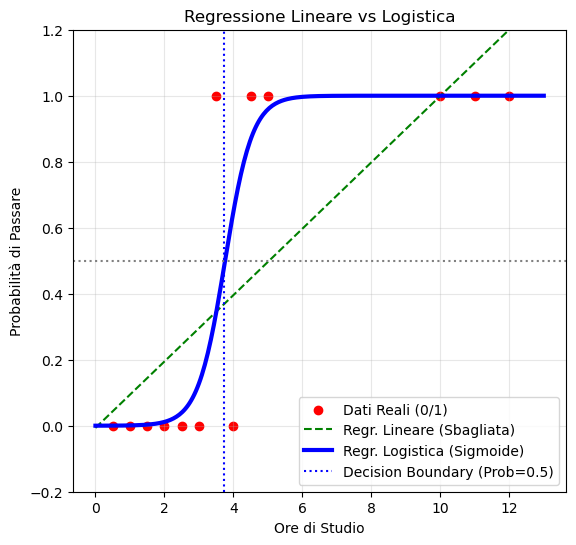

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression, LinearRegression

# --- Parte 1: Generazione Dati (Ore di studio vs Promosso/Bocciato) ---
# Creiamo un dataset giocattolo
X = np.array([0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 
              10.0, 11.0, 12.0]).reshape(-1, 1) # Ore di studio (notare il gap)
y = np.array([0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 
              1, 1, 1]) # 0=Bocciato, 1=Promosso

# --- Parte 2: Linear vs Logistic ---
# Linear Regression (L'approccio sbagliato)
lin_reg = LinearRegression()
lin_reg.fit(X, y)

# Logistic Regression (L'approccio corretto)
log_reg = LogisticRegression(C=1e5) # C alto = poca regolarizzazione
log_reg.fit(X, y)

# Dati per il plot continuo
X_test = np.linspace(0, 13, 300).reshape(-1, 1)

# Predizioni
y_lin_pred = lin_reg.predict(X_test)
y_log_prob = log_reg.predict_proba(X_test)[:, 1] # Probabilità della classe 1

# --- Visualizzazione 1: Le due curve ---
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(X, y, color='red', label='Dati Reali (0/1)')
plt.plot(X_test, y_lin_pred, 'g--', label='Regr. Lineare (Sbagliata)')
plt.plot(X_test, y_log_prob, 'b-', linewidth=3, label='Regr. Logistica (Sigmoide)')

# Disegniamo la soglia 0.5
plt.axhline(0.5, color='gray', linestyle=':')
plt.axvline(X_test[np.abs(y_log_prob - 0.5).argmin()], color='blue', linestyle=':', label='Decision Boundary (Prob=0.5)')

plt.ylim(-0.2, 1.2)
plt.title("Regressione Lineare vs Logistica")
plt.xlabel("Ore di Studio")
plt.ylabel("Probabilità di Passare")
plt.legend()
plt.grid(True, alpha=0.3)


In `scikit-learn`, il parametro **`C`** nella **Logistic Regression** rappresenta l'**inverso della forza di regolarizzazione**.

È uno dei "manopole" più importanti che puoi girare per controllare quanto il tuo modello si adatta ai dati di training rispetto alla sua capacità di generalizzare su dati nuovi.

-----

### 1\. La Regola d'Oro

Matematicamente, la relazione con il parametro di regolarizzazione classico (spesso indicato con $\lambda$ in statistica) è:

$$C = \frac{1}{\lambda}$$

Questo significa che il funzionamento è **controintuitivo**:

  * **Valori di C PICCOLI** = Regolarizzazione **FORTE**.
  * **Valori di C GRANDI** = Regolarizzazione **DEBOLE**.

### 2\. Come influenza il modello?

Il parametro `C` controlla il trade-off tra la semplicità del modello e quanto bene il modello classifica i punti del training set.

  * **C Basso (es. 0.01, 0.1):**

      * **Cosa succede:** Imponi una "penalità" molto alta ai coefficienti del modello. Li costringi a rimanere piccoli (vicini a zero).
      * **Effetto:** Il modello non si fida troppo dei singoli dati di training. Crea una linea di decisione (decision boundary) più semplice e "dritta".
      * **Rischio:** **Underfitting**. Il modello potrebbe essere troppo semplice per catturare la logica dei dati.

  * **C Alto (es. 100, 1000):**

      * **Cosa succede:** La penalità sui coefficienti è quasi inesistente. Il modello ha molta libertà.
      * **Effetto:** Il modello cerca di classificare correttamente *ogni singolo punto* del training set, anche quelli rumorosi (outlier). La linea di decisione diventa molto frastagliata e complessa.
      * **Rischio:** **Overfitting**. Il modello impara a memoria il training set ma sbaglierà su dati nuovi.

### 3\. L'Analogia della "Fiducia"

Immagina `C` come il livello di **fiducia cieca** che il modello ha nei dati di training:

  * **C Alto:** Il modello dice: *"Mi fido ciecamente di questi dati. Se c'è un punto strano qui, deve essere importante, quindi piegherò la mia linea per includerlo."*
  * **C Basso:** Il modello dice: *"Non mi fido ciecamente. Quel punto strano probabilmente è solo rumore/errore, quindi lo ignorerò per mantenere una regola generale più solida."*




# Modulo 3 - Lezione 2: Support Vector Machines (SVM)

## 1\. L'Intuizione Geometrica: La "Strada Più Larga"

Immaginate di avere due gruppi di punti (rossi e blu) su un foglio, separabili da una linea retta.
La Regressione Logistica troverà *una qualsiasi* linea che li separa. Ma alcune linee passano pericolosamente vicino ai punti.

L'SVM ha un obiettivo diverso: **Trovare la linea (iperpiano) che passa esattamente nel mezzo, mantenendo la massima distanza possibile dai punti più vicini di entrambe le classi.**

  * **Il Margine:** È la larghezza della "strada" che separa le due classi. SVM vuole massimizzarlo. Una strada più larga significa che il modello è più sicuro e generalizza meglio sui dati futuri.
  * **Support Vectors:** Sono i punti (dati) che toccano i bordi della strada.
      * *Concetto Chiave:* Sono gli unici punti che contano\! Se rimuovete tutti gli altri punti dal dataset ma lasciate i vettori di supporto, la linea non cambia di un millimetro. Questo rende SVM molto efficiente in termini di memoria del modello.

-----

## 2\. Il Kernel Trick: Fuggire dalla "Flatlandia"

Cosa succede se i dati non sono separabili da una retta? Immaginate un punto rosso circondato da punti blu (come un uovo fritto). Nessuna retta può separarli senza errori.

Qui avviene la magia matematica: il **Kernel Trick**.

L'idea è proiettare i dati da uno spazio a bassa dimensione (2D) a uno spazio a dimensione superiore (3D o infinito).

1.  Siamo in 2D: I punti blu circondano il rosso. Impossibile separare.
2.  **Proiezione:** Immaginate di sollevare il punto rosso (aggiungiamo una terza dimensione basata sulla distanza dal centro). Ora il punto rosso "galleggia" sopra quelli blu.
3.  **Separazione:** In 3D, possiamo inserire un foglio piatto (iperpiano) tra il punto rosso e quelli blu.
4.  **Ritorno:** Quando proiettiamo quel foglio piatto indietro in 2D, esso appare come un **cerchio** (o una curva complessa).

### Tipi di Kernel Comuni

  * **Lineare:** Nessuna proiezione. Veloce, per dati semplici o molto dimensionali (es. testo).
  * **Polinomiale:** Crea curve basate su potenze ($x^2, x^3$).
  * **RBF (Radial Basis Function):** Il default. Crea "isole" di classificazione attorno ai gruppi di punti. Matematicamente equivale a proiettare in uno spazio a infinite dimensioni.

-----

## 3\. Gli Iperparametri Critici: `C` e `Gamma`

Quando usate SVM in azienda, passerete il tempo a tunare questi due valori. Bisogna capirli intuitivamente.

### A. Parametro `C` (Tolleranza all'Errore)

Controlla quanto siamo rigidi sul "non commettere errori di classificazione" sul training set.

  * **C Alto (Severo):** "Non voglio vedere nessun errore\!". Il modello cercherà margini contorti pur di classificare tutto bene.
      * *Rischio:* Overfitting estremo. Margine stretto.
  * **C Basso (Tollerante):** "Va bene sbagliare qualche punto, preferisco una strada più larga".
      * *Vantaggio:* Margine più largo, generalizza meglio.

### B. Parametro `Gamma` (Raggio di Influenza - Solo per RBF)

Definisce quanto lontano arriva l'influenza di un singolo esempio di training.

  * **Gamma Alto:** Ogni punto ha un raggio cortissimo. Il modello crea piccole "isole" strette attorno ai punti.
      * *Rischio:* Overfitting (la mappa diventa a "macchia di leopardo").
  * **Gamma Basso:** L'influenza è vasta. I confini sono molto lisci e morbidi.

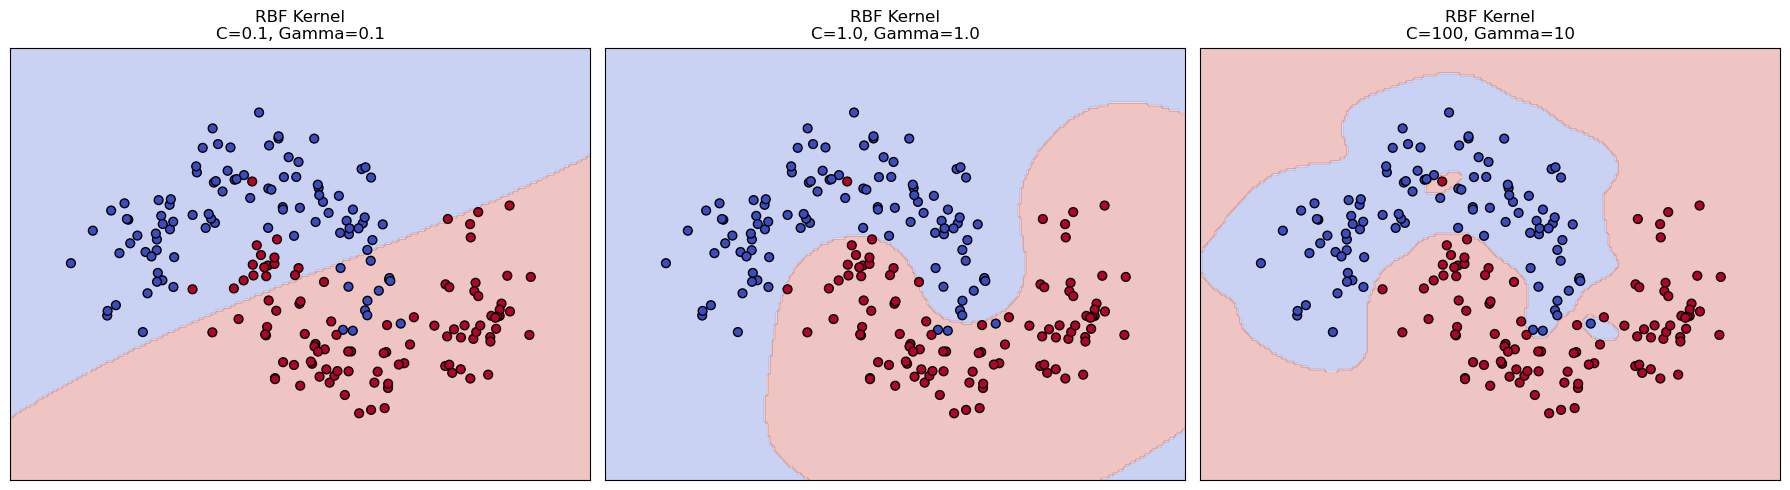

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC # Support Vector Classification
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# --- 1. Generazione Dati "Lune" (Non Lineari) ---
X, y = make_moons(n_samples=200, noise=0.2, random_state=42)

# Funzione helper per visualizzare i confini
def plot_decision_boundary(model, X, y, ax, title):
    # Creiamo una griglia fitta per colorare lo sfondo
    x0_min, x0_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    x1_min, x1_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx0, xx1 = np.meshgrid(np.arange(x0_min, x0_max, 0.02),
                           np.arange(x1_min, x1_max, 0.02))
    
    # Prediciamo su tutta la griglia
    Z = model.predict(np.c_[xx0.ravel(), xx1.ravel()])
    Z = Z.reshape(xx0.shape)
    
    # Plot contorni e punti
    ax.contourf(xx0, xx1, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k', s=40)
    ax.set_title(title)
    ax.set_xticks(())
    ax.set_yticks(())

# --- 2. Setup Esperimento: Variazioni di C e Gamma ---
# Nota: SVM richiede SEMPRE scaling perché è basato su distanze!
models_params = [
    (0.1, 0.1),  # C Basso, Gamma Basso (Underfitting?)
    (1.0, 1.0),  # Bilanciato (Good Fit?)
    (100, 10),   # C Alto, Gamma Alto (Overfitting!)
]

fig, subplots = plt.subplots(1, 3, figsize=(18, 5))

for (C_val, gamma_val), ax in zip(models_params, subplots):
    # Creiamo il modello con Kernel RBF
    # Usiamo make_pipeline per includere lo scaler automaticamente
    clf = make_pipeline(
        StandardScaler(),
        SVC(kernel="rbf", C=C_val, gamma=gamma_val)
    )
    
    clf.fit(X, y)
    
    title = f"RBF Kernel\nC={C_val}, Gamma={gamma_val}"
    plot_decision_boundary(clf, X, y, ax, title)

plt.tight_layout()
plt.show()

# Modulo 3 - Lezione 3: K-Nearest Neighbors (K-NN)

## 1\. La Filosofia: "Lazy Learning"

Tutti gli algoritmi visti finora (Regressione, SVM) sono **"Eager Learners"**: durante il training calcolano una formula fissa ($w \cdot x + b$) e poi buttano via i dati di training. Il modello è solo l'equazione.

Il K-NN è un **"Lazy Learner"**:

  * **Training:** Non fa nulla\! Memorizza semplicemente tutti i dati.
  * **Inference (Predizione):** È qui che lavora. Quando arriva un nuovo punto, calcola la distanza tra quel punto e *tutti* i punti memorizzati, trova i $K$ più vicini e fa una votazione a maggioranza.

**Algoritmo Non-Parametrico:**
Non assume che i dati seguano una forma specifica (retta, gaussiana). La "forma" della decisione è definita localmente dai dati stessi.

## 2\. La Matematica della Distanza

Il cuore del K-NN è rispondere alla domanda: *"Quanto sono vicini due punti?"*
Scegliere la metrica sbagliata distrugge il modello.

Siano due punti vettoriali $x$ e $y$ in uno spazio a $n$ dimensioni.

### A. Distanza Euclidea (Norma L2)

È la distanza "a volo d'uccello" (il teorema di Pitagora generalizzato).
$$d(x, y) = \sqrt{\sum_{i=1}^{n} (x_i - y_i)^2}$$

  * **Uso:** Standard per dati continui e fisici.
  * **Difetto:** Sensibilissima agli outlier (il quadrato amplifica gli errori grandi).

### B. Distanza di Manhattan (Norma L1)

È la distanza "del tassista" in una città a griglia. Si può viaggiare solo lungo gli assi.
$$d(x, y) = \sum_{i=1}^{n} |x_i - y_i|$$

  * **Uso:** Alta dimensionalità o quando le feature sono ortogonali/indipendenti (es. griglie discrete).

### C. Distanza di Minkowski (Generalizzazione)

È la formula madre che le include tutte, controllata dal parametro $p$.
$$d(x, y) = \left( \sum_{i=1}^{n} |x_i - y_i|^p \right)^{\frac{1}{p}}$$

  * $p=1$: Manhattan.
  * $p=2$: Euclidea.
  * In Scikit-Learn, il parametro `p` controlla proprio questo.

-----

## 3\. Il Paradosso di $K$ e la "Maledizione della Dimensionalità"

### Come scegliere K?

  * **$K=1$ (Overfitting Estremo):** Il modello copia esattamente il rumore. Se c'è un punto blu errato in mezzo ai rossi, si creerà una piccola isola blu solo per lui. La frontiera è frastagliata.
  * **$K$ Alto (Underfitting):** La decisione diventa troppo "democratica". I dettagli locali si perdono e vince sempre la classe più numerosa. La frontiera diventa troppo liscia.

### The Curse of Dimensionality (Concetto Senior)

Questo è il motivo per cui K-NN non si usa quasi mai su dati con centinaia di colonne (es. pixel grezzi).

**Intuizione:** Immaginate un cubo unitario.

  * In 2D, per coprire il 10% dello spazio, dovete prendere un quadrato di lato $\sqrt{0.10} \approx 0.31$.
  * In 100 dimensioni, per coprire lo stesso 10% di volume (per trovare vicini), dovete prendere un ipercubo di lato $\sqrt[100]{0.10} \approx 0.97$.

**Significato:** In alte dimensioni, per trovare dei vicini dovete guardare così lontano che **tutti i punti diventano quasi equidistanti**. Il concetto di "vicinanza" perde significato matematico.


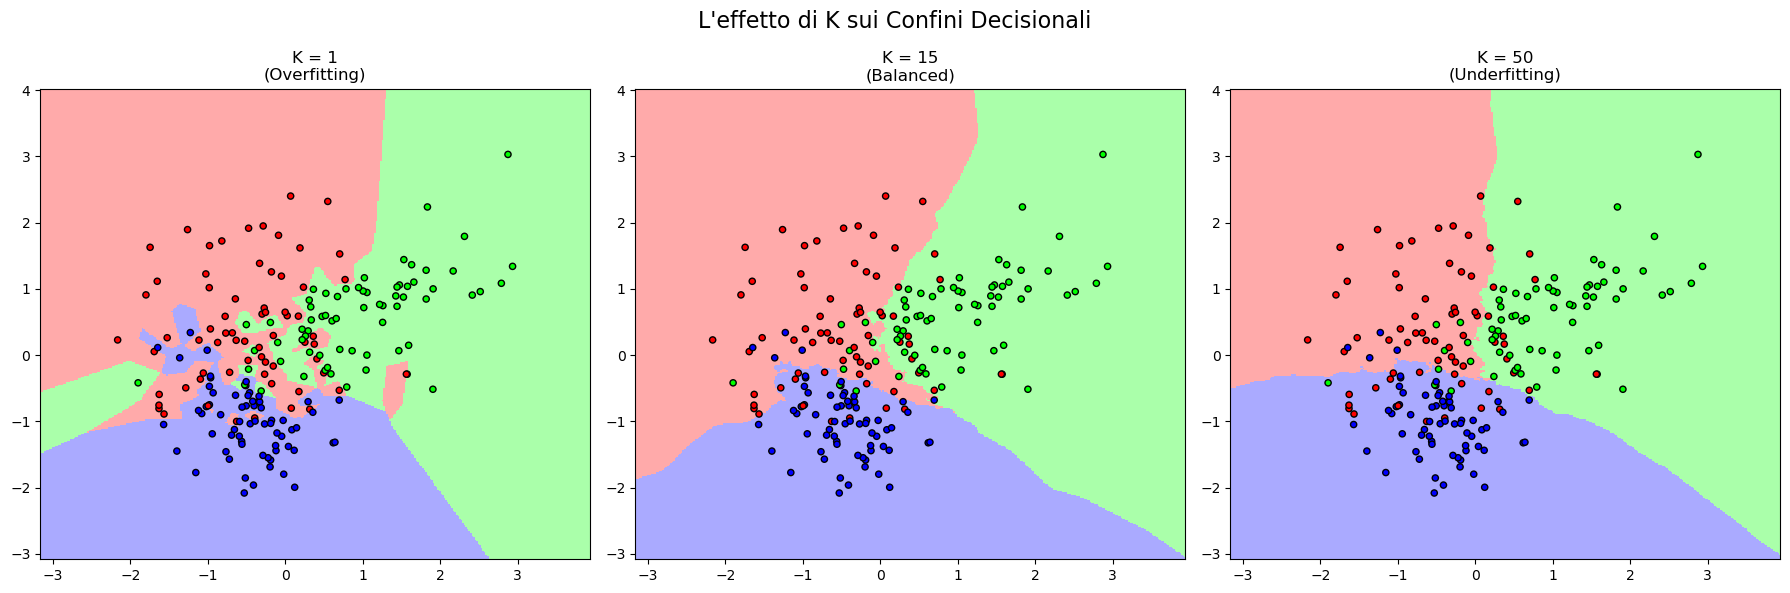

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler

# --- 1. Generazione Dati ---
# Creiamo un dataset con 3 classi e 2 feature per poterlo disegnare
X, y = make_classification(n_samples=200, n_features=2, n_redundant=0, 
                           n_informative=2, n_clusters_per_class=1, 
                           n_classes=3, random_state=42)

# Scaling (Obbligatorio per KNN)
scaler = StandardScaler()
X = scaler.fit_transform(X)

# --- 2. Setup Visualizzazione ---
h = .02  # Passo della griglia
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

# Configuriamo 3 scenari
n_neighbors_list = [1, 15, 50]

plt.figure(figsize=(18, 6))

for i, k in enumerate(n_neighbors_list):
    # Training del modello
    # weights='uniform': tutti i voti valgono 1
    # weights='distance': i vicini più prossimi contano di più (spesso migliore)
    clf = KNeighborsClassifier(n_neighbors=k, weights='uniform')
    clf.fit(X, y)

    # Creazione della griglia per il plot (Decision Boundary)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    # Predizione su ogni punto della griglia
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot
    ax = plt.subplot(1, 3, i + 1)
    ax.pcolormesh(xx, yy, Z, cmap=cmap_light, shading='auto')
    
    # Plot dei punti di training
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20)
    
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_title(f"K = {k}\n({'Overfitting' if k==1 else 'Underfitting' if k==50 else 'Balanced'})")

plt.suptitle("L'effetto di K sui Confini Decisionali", fontsize=16)
plt.tight_layout()
plt.show()


# Modulo 4: Diagnostica del Modello e "Controllo Qualità"

In questo modulo smettiamo di imparare nuovi algoritmi e impariamo a **fidarci** (o a diffidare) di quelli che abbiamo.
L'obiettivo è rispondere alla domanda del manager: *"Se mettiamo questo modello in produzione domani, quanto oscilleranno le sue prestazioni?"*

-----

## Lezione 1: Design della Validazione (Cross-Validation)

Fino ad ora abbiamo fatto `train_test_split` una sola volta.
**Il rischio:** E se il nostro Test Set contenesse casualmente solo gli esempi più facili? O solo quelli più difficili? Avremmo una stima falsata (troppo ottimista o pessimista).

### 1\. K-Fold Cross-Validation

Invece di un solo esame finale, facciamo 5 o 10 simulazioni.

1.  Dividiamo il Train Set in $K$ parti (Folds).
2.  Addestriamo su $K-1$ parti, testiamo sulla parte rimanente.
3.  Ripetiamo $K$ volte ruotando la parte di test.

### 2\. Stratified K-Fold (Per la Classificazione)

Se stiamo usando la **Regressione Logistica** per classificare una malattia rara (1% dei casi), un taglio casuale potrebbe mettere *tutti* i malati nel Test set e nessuno nel Train set.
La **Stratified K-Fold** garantisce che la percentuale di classi sia mantenuta identica in ogni piega.

### Laboratorio Python: Cross-Validation con Regressione Logistica

Useremo un dataset di classificazione sintetico per vedere la stabilità del modello.



In [ ]:

import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression

# --- 1. Generazione Dati (Classificazione Binaria) ---
# Creiamo 1000 campioni, 20 feature.
# weights=[0.9, 0.1] crea un dataset sbilanciato (90% classe 0, 10% classe 1)
X, y = make_classification(n_samples=1000, n_features=20, 
                           n_informative=5, n_redundant=5, 
                           weights=[0.9, 0.1], random_state=42)

print(f"Distribuzione Classi: {np.bincount(y)} (Molto sbilanciato!)")

# --- 2. Configurazione del Modello ---
# Usiamo LogisticRegression (già nota)
model = LogisticRegression(solver='liblinear') # liblinear va bene per dataset piccoli

# --- 3. Stratified K-Fold ---
# Vogliamo 5 round di validazione.
# Shuffle=True è fondamentale per mescolare i dati prima di tagliare.
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# --- 4. Esecuzione della Cross-Validation ---
# scoring='f1': Usiamo F1-score perché l'accuratezza è inutile su dati sbilanciati
scores = cross_val_score(model, X, y, cv=cv, scoring='f1')

print("\n--- Risultati Cross-Validation (5 Folds) ---")
for i, score in enumerate(scores):
    print(f"Fold {i+1}: F1-Score = {score:.4f}")

print(f"\n>> Performance Media: {scores.mean():.4f}")
print(f">> Stabilità (Deviazione Std): +/- {scores.std():.4f}")



Distribuzione Classi: [897 103] (Molto sbilanciato!)

--- Risultati Cross-Validation (5 Folds) ---
Fold 1: F1-Score = 0.2308
Fold 2: F1-Score = 0.2667
Fold 3: F1-Score = 0.4828
Fold 4: F1-Score = 0.3571
Fold 5: F1-Score = 0.2222

>> Performance Media: 0.3119
>> Stabilità (Deviazione Std): +/- 0.0979


**Analisi:**

  * Se la deviazione standard è bassa (es. 0.02), il modello è **Robusto**.
  * Se la deviazione è alta (es. 0.15), il modello è **Instabile**: dipende troppo da quali dati vede. Non è pronto per la produzione.




# Modulo 4 - Lezione 2: Metriche di Classificazione (Oltre l'Accuratezza)

## 1\. Il Paradosso dell'Accuratezza

Immaginate di lavorare in banca per un sistema anti-frode.

  * Transazioni legittime: 99.9%
  * Transazioni fraudolente: 0.1%

Se creo un modello "stupido" che dice **SEMPRE "Legittimo"** (non rileva nessuna frode), qual è la sua accuratezza?
$$Accuracy = \frac{\text{Risposte Corrette}}{\text{Totale Casi}} = 99.9\%$$

Ho un'accuratezza stellare, ma il mio modello è **inutile** per il business (ho perso tutte le frodi).
Per questo abbiamo bisogno della **Confusion Matrix**.

-----

## 2\. La Confusion Matrix (Anatomia dell'Errore)

Non contiamo solo *quanto* sbagliamo, ma *come* sbagliamo. Dividiamo le predizioni in 4 categorie.

Immaginiamo un test medico per una malattia:

  * **Classe 1 (Positivo):** Malato.
  * **Classe 0 (Negativo):** Sano.

| | **Realtà: Sano (0)** | **Realtà: Malato (1)** |
| :--- | :---: | :---: |
| **Predico: Sano (0)** | **TN (True Negative)**<br>Bravo, hai detto sano ed è sano. | **FN (False Negative)**<br>*Errore Grave\!* Hai mandato a casa un malato dicendo che sta bene. |
| **Predico: Malato (1)** | **FP (False Positive)**<br>*Falso Allarme.* Hai spaventato un sano, ma è meno grave. | **TP (True Positive)**<br>Bravo, hai trovato la malattia. |

-----

## 3\. Precision, Recall e F1-Score

Dal conteggio di questi 4 numeri, deriviamo le metriche reali.

### A. Precision (Precisione)

*"Quando il modello suona l'allarme, quanto spesso ha ragione?"*
$$Precision = \frac{TP}{TP + FP}$$

  * **Focus:** Non voglio falsi allarmi.
  * **Esempio:** **Filtro Spam**. Se un'email importante finisce nello spam (FP), è un disastro. Preferisco lasciar passare un po' di spam (FN) ma essere *preciso* quando blocco.

### B. Recall (Richiamo / Sensibilità)

*"Di tutti i malati che esistono, quanti ne ho trovati?"*
$$Recall = \frac{TP}{TP + FN}$$

  * **Focus:** Non voglio perdere nessun caso positivo.
  * **Esempio:** **Tumori**. Se dico a un malato che è sano (FN), lui muore. Devo trovare *tutti* i malati, anche a costo di fare qualche biopsia inutile su sani (FP).

### C. F1-Score (La media armonica)

Se ho Precision alta e Recall bassa (o viceversa), il modello è sbilanciato. Come faccio una media?
La media aritmetica è sbagliata.

  * Scenario: Precision = 1.0 (Perfetta), Recall = 0.01 (Pessima).
  * Media Aritmetica: $(1 + 0.01) / 2 = 0.505$ (Sembra decente, ma il modello è orribile).

Usiamo la **Media Armonica**, che "punisce" i valori bassi:
$$F1 = 2 \cdot \frac{Precision \cdot Recall}{Precision + Recall}$$

  * Nell'esempio sopra: $2 * (1 * 0.01) / 1.01 \approx 0.019$.
  * L'F1-Score è alto solo se **entrambe** le metriche sono buone.

-----

## 4\. Laboratorio Python: Analisi Diagnostica

Useremo il dataset **Breast Cancer** (Tumore al seno) di Scikit-Learn. È un caso classico dove la **Recall** è più importante della Precision.


c:\Users\mbagn\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 3000 iteration(s) (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=3000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


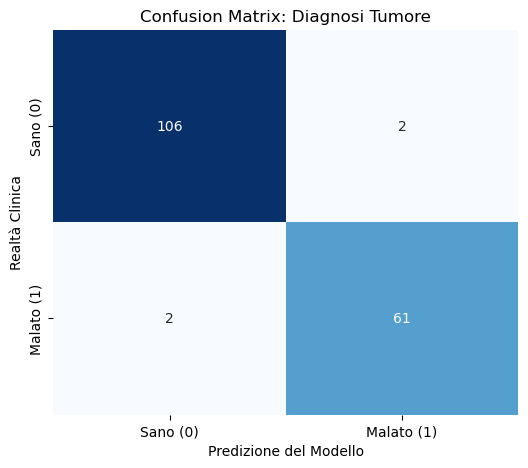

True Negatives (Sani riconosciuti): 106
False Positives (Falsi Allarmi): 2
False Negatives (Malati persi - GRAVE): 2
True Positives (Malati trovati): 61

--- Classification Report ---
              precision    recall  f1-score   support

    Sano (0)       0.98      0.98      0.98       108
  Malato (1)       0.97      0.97      0.97        63

    accuracy                           0.98       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171


Verifica Manuale:
Recall (Sensibilità): 0.97 -> Ho trovato il 97% dei malati.
Precision: 0.97 -> Delle mie diagnosi positive, il 97% era corretto.
F1-Score: 0.97


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# --- 1. Caricamento Dati ---
data = load_breast_cancer()
X = data.data
y = data.target
# Nota: Nel dataset originale, 0=Maligno, 1=Benigno. 
# Per didattica, invertiamo le etichette per avere 1=Maligno (Caso Positivo da trovare)
y = (y == 0).astype(int) 

target_names = ['Sano (0)', 'Malato (1)']

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# --- 2. Training (Regressione Logistica) ---
# max_iter=3000 serve perché i dati non sono scalati e l'algoritmo fatica a convergere
model = LogisticRegression(max_iter=3000)
model.fit(X_train, y_train)

# --- 3. Predizione ---
y_pred = model.predict(X_test)

# --- 4. La Confusion Matrix ---
cm = confusion_matrix(y_test, y_pred)

# Visualizzazione Heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predizione del Modello')
plt.ylabel('Realtà Clinica')
plt.title('Confusion Matrix: Diagnosi Tumore')
plt.show()

# Estrazione manuale dei valori
tn, fp, fn, tp = cm.ravel()
print(f"True Negatives (Sani riconosciuti): {tn}")
print(f"False Positives (Falsi Allarmi): {fp}")
print(f"False Negatives (Malati persi - GRAVE): {fn}")
print(f"True Positives (Malati trovati): {tp}")

# --- 5. Report Metriche Completo ---
print("\n--- Classification Report ---")
print(classification_report(y_test, y_pred, target_names=target_names))

# Calcolo manuale per verifica
recall = tp / (tp + fn)
precision = tp / (tp + fp)
f1 = 2 * (precision * recall) / (precision + recall)

print(f"\nVerifica Manuale:")
print(f"Recall (Sensibilità): {recall:.2f} -> Ho trovato il {recall*100:.0f}% dei malati.")
print(f"Precision: {precision:.2f} -> Delle mie diagnosi positive, il {precision*100:.0f}% era corretto.")
print(f"F1-Score: {f1:.2f}")

### Analisi dei Risultati 

1.  **Guardate la Heatmap:**

      * La diagonale scura (TN e TP) sono le risposte giuste.
      * Guardate l'angolo in basso a sinistra (**FN**): Quello è il numero che vi tiene svegli la notte. Sono pazienti malati a cui il modello ha detto "Tutto ok".
      * In questo caso specifico (Medicina), vorremmo spingere quel numero a zero, anche a costo di aumentare i Falsi Positivi.

2.  **Il Trade-off Precision/Recall:**

      * Non potete massimizzare entrambe all'infinito (è una coperta corta).
      * Se abbassate la soglia di probabilità (es. "Dico che è malato se prob \> 10%" invece del 50%), troverete tutti i malati (**Recall sale**), ma avrete un sacco di falsi allarmi (**Precision scende**).




# Modulo 5 - Lezione 1: Decision Trees e la Matematica dell'Incertezza

## 1\. Come la macchina fa domande

Immaginate di dover classificare se un frutto è una **Mela** o un **Limone**.
Avete due feature: *Colore* (Giallo/Rosso) e *Forma* (Sferica/Allungata).

L'albero non calcola una formula complessa. Cerca la domanda che divide meglio i dati.

1.  **Domanda 1:** "È Giallo?"
      * **No (Rosso):** È sicuramente una **Mela**. (Impurezza = 0). Stop.
      * **Sì (Giallo):** Potrebbe essere un Limone o una Mela Golden. Serve un'altra domanda.
2.  **Domanda 2:** "È Sferico?"
      * **Sì:** Mela Golden.
      * **No:** Limone.

Geometricamente, un Albero Decisionale **taglia lo spazio in rettangoli** (o iper-rettangoli) ortogonali agli assi.


-----

## 2\. La Matematica dell'Incertezza

Come fa il computer a scegliere *quale* domanda fare per prima? Perché "È Giallo?" è meglio di "È Sferico?"?
Deve misurare l'**Impurezza** (il caos) dei dati prima e dopo la domanda.

L'obiettivo è massimizzare l'**Information Gain** (Guadagno di Informazione): passare da uno stato di caos a uno stato di ordine.

Esistono due metriche per misurare il caos:

### A. Entropia di Shannon (La fisica dell'informazione)

Presa dalla termodinamica e dalla teoria dell'informazione.
Se abbiamo $C$ classi, e $p_i$ è la probabilità della classe $i$ in un nodo:

$$H(S) = - \sum_{i=1}^{C} p_i \log_2(p_i)$$

  * **Entropia = 0:** Ordine perfetto (tutti gli esempi sono Mele).
  * **Entropia = 1 (per 2 classi):** Caos massimo (50% Mele, 50% Limoni). Non so nulla.

### B. Indice di Gini (Lo standard industriale)

È l'impostazione di default di Scikit-Learn perché è computazionalmente più veloce (non calcola logaritmi).
Misura la probabilità di classificare erroneamente un elemento scelto a caso.

$$Gini(S) = 1 - \sum_{i=1}^{C} p_i^2$$

  * **Gini = 0:** Purezza totale.
  * **Gini = 0.5 (per 2 classi):** Caos massimo.

### C. Information Gain (Come si sceglie lo split)

L'algoritmo (CART) prova tutte le possibili domande su tutte le feature e calcola:
$$Gain = \text{Impurezza Genitore} - \text{Media Ponderata Impurità Figli}$$
Sceglie la domanda che massimizza questo valore (riduce di più il caos).

-----

## 3\. Il problema dell'Overfitting (Potatura)

Se lasciamo un albero libero di crescere, continuerà a fare domande finché ogni singola foglia conterrà un solo esempio (Gini = 0).

  * **Risultato:** Un albero mostruoso che ha imparato a memoria il training set (Accuratezza 100%), ma che fallirà su nuovi dati.
  * **Soluzione:** **Pruning (Potatura)**. Imponiamo dei limiti.
      * `max_depth`: Massima profondità dell'albero.
      * `min_samples_split`: Numero minimo di campioni per poter dividere un nodo.
      * `min_samples_leaf`: Numero minimo di campioni che devono restare in una foglia.

-----

## 4\. Laboratorio Python: Visualizzare la "Scatola Bianca"

Useremo il dataset **Iris** (fiori).
Vedremo due cose fondamentali:

1.  **La Struttura:** Disegneremo l'albero vero e proprio per leggere le regole.
2.  **La Geometria:** Vedremo come l'albero taglia il piano 2D in rettangoli.



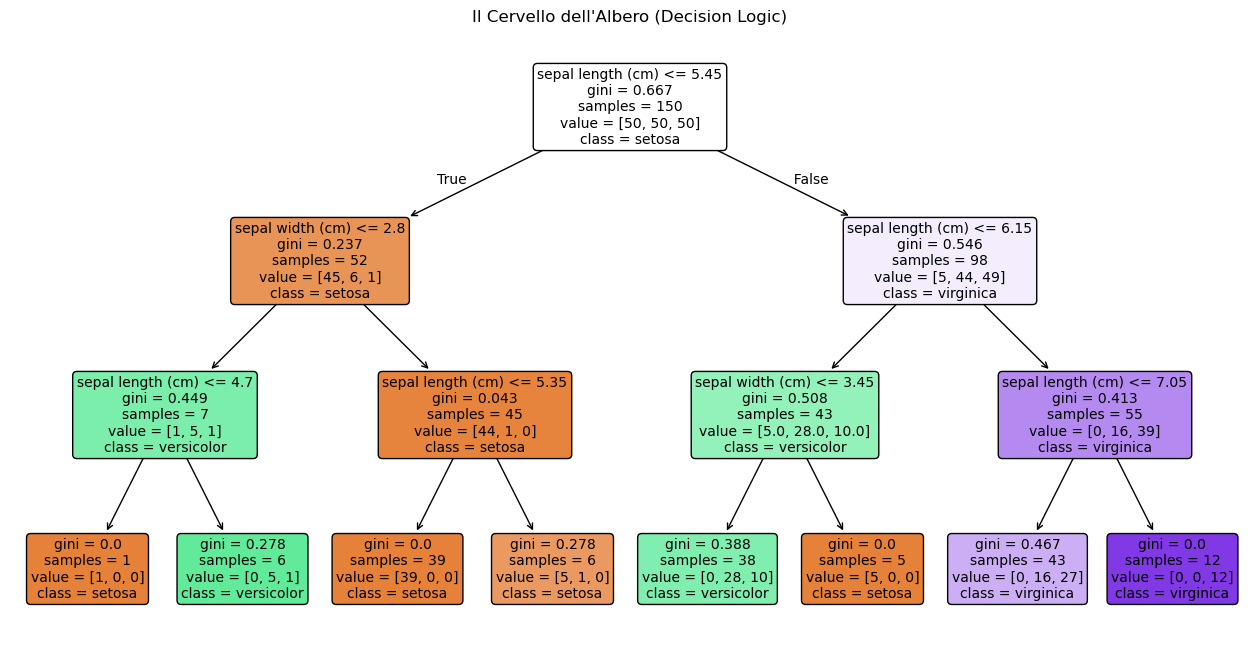

<Figure size 1000x800 with 0 Axes>

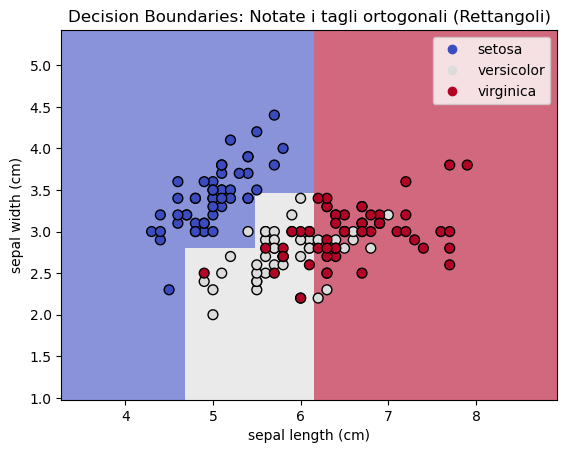

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.inspection import DecisionBoundaryDisplay

# --- 1. Caricamento Dati ---
iris = load_iris()
# Prendiamo solo le prime 2 feature per poter disegnare in 2D
# (Lunghezza Sepalo, Larghezza Sepalo)
X = iris.data[:, :2]  
y = iris.target

# --- 2. Addestramento Albero (Con Potatura) ---
# max_depth=3: Limitiamo la profondità per evitare overfitting e rendere leggibile il grafico
clf = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=42)
clf.fit(X, y)

# --- 3. Visualizzazione 1: La Struttura dell'Albero ---
plt.figure(figsize=(16, 8))
plot_tree(clf, 
          filled=True, 
          feature_names=iris.feature_names[:2], 
          class_names=iris.target_names,
          rounded=True,
          fontsize=10)
plt.title("Il Cervello dell'Albero (Decision Logic)")
plt.show()

# --- 4. Visualizzazione 2: I Confini Decisionali (Rettangoli) ---
plt.figure(figsize=(10, 8))

# Funzione moderna di sklearn per plottare i confini
DecisionBoundaryDisplay.from_estimator(
    clf, X, 
    cmap=plt.cm.coolwarm, 
    plot_method="pcolormesh",
    shading="auto",
    alpha=0.6,
    response_method="predict"
)

# Plot dei punti reali (Scatter)
scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors="k", s=50)
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title("Decision Boundaries: Notate i tagli ortogonali (Rettangoli)")
plt.legend(handles=scatter.legend_elements()[0], labels=list(iris.target_names))

plt.show()


### Analisi dei Risultati 

#### Grafico 1: L'Albero (Flowchart)

Questo è il motivo per cui le banche e gli ospedali amano questi modelli.
Leggete il primo nodo in alto (Radice):

  * `Sepal Length <= 5.45`: È la domanda più importante.
  * `gini = 0.66`: Il caos iniziale.
  * Se è VERO (sinistra), andiamo in un nodo con `gini = 0.2`. L'incertezza è crollata\! Abbiamo guadagnato informazione.

#### Grafico 2: I Confini (Rettangoli)

Confrontate mentalmente questo grafico con quello delle SVM o della Logistic Regression.

  * Le SVM facevano curve morbide o rette oblique.
  * L'Albero fa **linee verticali e orizzontali**. Taglia il piano a "fette".
  * **Difetto:** La natura raramente è fatta a gradini. Un confine a gradini (zig-zag) per approssimare una diagonale è inefficiente e instabile.

### Conclusione: La Forza del Numero

Un singolo albero è **instabile** (alta varianza). Basta cambiare leggermente i dati e la struttura dell'albero cambia completamente. Inoltre tende all'overfitting.



# Modulo 5 - Lezione 2: Bagging e Random Forest

## 1\. Il Teorema della Giuria (Condorcet's Jury Theorem)

Perché unire 100 modelli "mediocri" dovrebbe darne uno "eccellente"? C'è una base matematica precisa del 1785.

**Il Teorema:**
Immaginate una giuria di $N$ persone che devono decidere tra "Colpevole" (1) o "Innocente" (0).

  * Assunzione 1: Ogni giurato ha una probabilità $p > 0.5$ di indovinare (è leggermente meglio del lancio di una moneta).
  * Assunzione 2: I giurati sono **indipendenti** (non si influenzano a vicenda).

Se facciamo votare la maggioranza, la probabilità che la giuria prenda la decisione corretta aumenta drasticamente con il numero dei giurati.

  * Con $p=0.51$ (appena meglio del caso) e 1000 giurati, l'accuratezza della giuria sale quasi al **75%**.
  * Con 10.000 giurati, tende al **100%**.

**Nel Machine Learning:**

  * Giurato = Un singolo Albero Decisionale (Weak Learner).
  * Voto = Predizione della classe.
  * **Il Segreto:** La chiave è l'**Indipendenza**. Se tutti gli alberi sono uguali, sbagliano tutti insieme. Dobbiamo creare alberi *diversi*.

-----

## 2\. Bagging (Bootstrap Aggregating)

Come creiamo alberi diversi se abbiamo un solo Training Set? Usiamo la statistica.

### Fase 1: Bootstrap (Campionamento con reinserimento)

Creiamo $N$ nuovi dataset "finti" partendo dall'originale.
Peschiamo righe a caso dal dataset originale, ma **rimettiamo la riga nel sacco** dopo averla pescata.

  * *Risultato:* Ogni nuovo dataset avrà circa il 63% delle righe originali uniche, mentre il restante 37% sono duplicati. Alcune righe mancheranno del tutto.
  * Questo garantisce che ogni albero veda una "versione diversa della realtà".

### Fase 2: Aggregating (Aggregazione)

Alleniamo un albero su ogni dataset bootstrap.

  * **Classificazione:** Hard Voting. La classe più votata vince.
  * **Regressione:** Averaging. Si fa la media delle predizioni numeriche.

-----

## 3\. Random Forest: L'evoluzione del Bagging

Il Bagging ha un difetto. Se nel dataset c'è una feature fortissima (es. "Fumatore" per predire il cancro), **tutti** gli alberi la sceglieranno come primo nodo (Root Node).
Risultato: Gli alberi saranno strutturalmente simili (correlati). Il teorema della giuria fallisce perché i giurati non sono indipendenti.

La **Random Forest** aggiunge un trucco geniale: **Feature Randomness**.
Ogni volta che un albero deve fare uno split (una domanda):

1.  Non guarda tutte le feature disponibili.
2.  Ne seleziona un sottoinsieme casuale (solitamente $\sqrt{\text{Numero Feature}}$).
3.  Sceglie la feature migliore solo tra quelle poche.

**Effetto:** Costringiamo alcuni alberi a usare feature "secondarie". Questo **decorrela** gli errori. Se la feature "Fumatore" è sbagliata o rumorosa, alcuni alberi non la useranno e ci salveranno.

-----

## 4\. Laboratorio Python: Albero Singolo vs Foresta

Useremo un dataset rumoroso (`make_moons`) per vedere visivamente come la Random Forest "liscia" i confini frastagliati di un singolo albero.



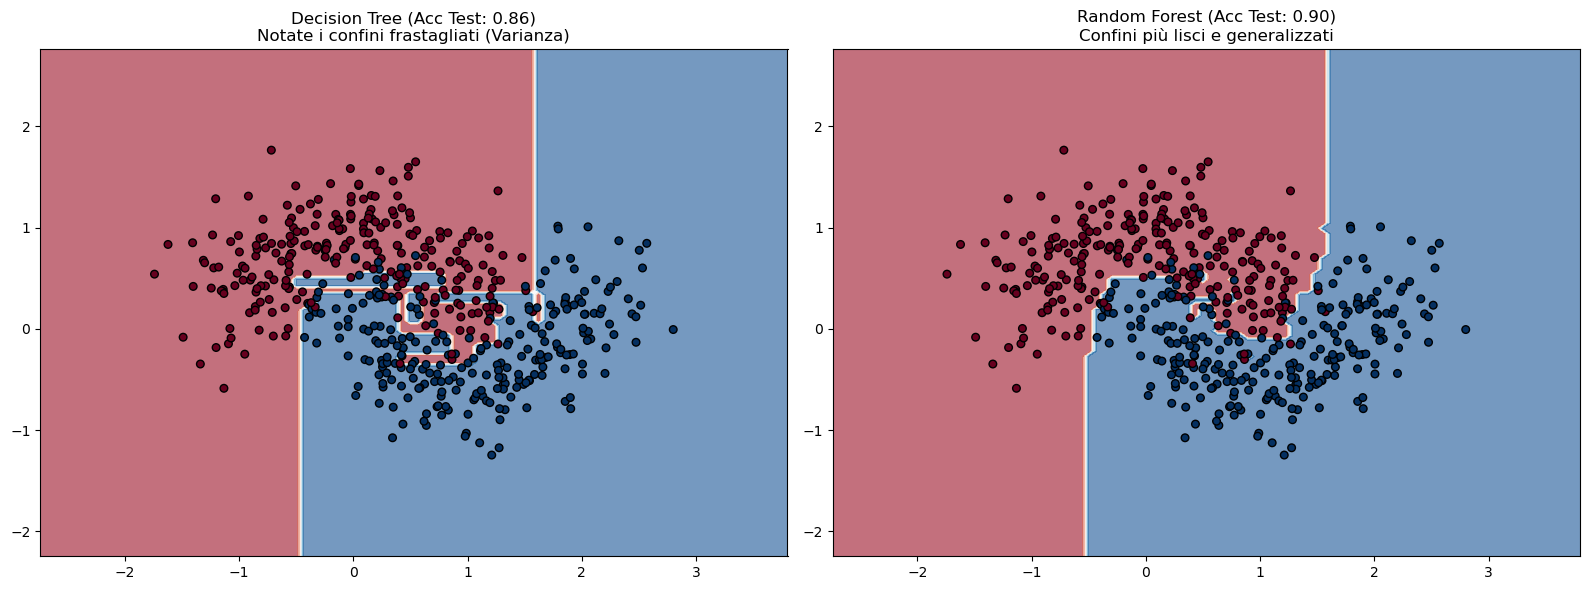

--- Feature Importance ---
Importanza Feature 0 (Asse X): 0.4466
Importanza Feature 1 (Asse Y): 0.5534


In [4]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import DecisionBoundaryDisplay

# --- 1. Generazione Dati (Rumorosi) ---
X, y = make_moons(n_samples=500, noise=0.3, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# --- 2. Training dei Modelli ---

# MODELLO A: Albero Singolo (Senza limiti -> Overfitting)
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)

# MODELLO B: Random Forest (100 alberi)
# n_estimators: Numero di alberi (giurati)
# n_jobs=-1: Usa tutti i core della CPU in parallelo (è molto veloce)
forest = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
forest.fit(X_train, y_train)

# --- 3. Visualizzazione Comparativa ---
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# Plot Albero Singolo
DecisionBoundaryDisplay.from_estimator(
    tree, X, cmap=plt.cm.RdBu, alpha=0.6, ax=ax[0], response_method="predict"
)
ax[0].scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdBu, edgecolors='k', s=30)
ax[0].set_title(f"Decision Tree (Acc Test: {tree.score(X_test, y_test):.2f})\nNotate i confini frastagliati (Varianza)", fontsize=12)

# Plot Random Forest
DecisionBoundaryDisplay.from_estimator(
    forest, X, cmap=plt.cm.RdBu, alpha=0.6, ax=ax[1], response_method="predict"
)
ax[1].scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdBu, edgecolors='k', s=30)
ax[1].set_title(f"Random Forest (Acc Test: {forest.score(X_test, y_test):.2f})\nConfini più lisci e generalizzati", fontsize=12)

plt.tight_layout()
plt.show()

# --- 4. Feature Importance (Bonus delle Random Forest) ---
# Essendo un insieme di alberi, possiamo chiedere: "Quali feature sono state usate più spesso per tagliare bene?"
print("--- Feature Importance ---")
# Immaginiamo che X0 sia coordinata X e X1 sia Y
importances = forest.feature_importances_
print(f"Importanza Feature 0 (Asse X): {importances[0]:.4f}")
print(f"Importanza Feature 1 (Asse Y): {importances[1]:.4f}")

### Analisi Diagnostica 

1.  **L'Albero Singolo (Sinistra):**
    Guardate come il confine rosso/blu è "nervoso". Crea isole piccolissime per catturare singoli punti rumorosi. Se arrivasse un nuovo dato vicino a quelle isole, verrebbe classificato male. Questo è l'**Overfitting** classico.
2.  **La Random Forest (Destra):**
    Il confine è morbido, quasi una curva pulita. La Foresta ha ignorato i punti isolati (rumore) perché la maggioranza degli alberi ha votato contro di loro.
      * *Risultato:* Migliore accuratezza sul Test set e molta più stabilità.

### Quando usare Random Forest?

È il "Coltellino Svizzero" del Data Science:

  * **Pro:**
      * Funziona "out of the box" con pochi tuning.
      * Non richiede scaling dei dati (gli alberi tagliano su valori assoluti).
      * Gestisce bene feature non lineari.
      * Fornisce `feature_importances_`.
  * **Contro:**
      * Modello pesante in memoria (deve salvare 100 alberi).
      * Lento in predizione (deve interrogare 100 alberi). Non adatto a sistemi real-time a bassissima latenza (microsecondi).

**Prossimo Step:**
La Random Forest usa alberi *indipendenti* in parallelo.
E se invece allenassimo alberi in sequenza, dove ogni albero cerca di correggere gli errori di quello precedente?
Questa è l'idea alla base del **Boosting** (XGBoost), l'algoritmo che vince quasi tutte le competizioni su dati tabellari.

Abbiamo visto le **Random Forest**: una democrazia parallela dove 100 alberi indipendenti votano. È un metodo robusto, difficile da rompere, ma a volte "grezzo".

Ora passiamo al **Boosting**. Qui cambiamo completamente filosofia.
Non è una democrazia. È una **Staffetta Olimpica** (o una catena di montaggio specializzata).

-----

# Modulo 5 - Lezione 3: Boosting (Gradient Boosting, XGBoost & LightGBM)

## 1\. Il Concetto: Imparare dai propri errori

Nel Bagging (Random Forest), gli alberi sono indipendenti. Se il primo albero sbaglia a classificare un caso difficile, il centesimo albero probabilmente sbaglierà allo stesso modo, perché non si parlano.

Nel **Boosting**, gli alberi sono sequenziali:

1.  **Albero 1:** Fa una previsione grezza su tutto il dataset. Sbaglia molto.
2.  **Calcolo Errori:** Identifichiamo dove l'Albero 1 ha fallito (i residui).
3.  **Albero 2:** Non si allena sul target originale ($y$). **Si allena sugli errori dell'Albero 1**. Il suo unico scopo è correggere il predecessore.
4.  **Albero 3:** Si allena sugli errori rimasti dall'Albero 2.
5.  **Predizione Finale:** È la somma pesata di tutti gli alberi.
    $$F(x) = \text{Albero}_1(x) + \eta \cdot \text{Albero}_2(x) + \eta \cdot \text{Albero}_3(x) ...$$

**Analogia del Golf:**

  * **Random Forest:** 100 persone tirano una pallina verso la buca. La posizione finale è la media di tutti i tiri.
  * **Boosting:**
    1.  Tiro 1 (Driver): Arrivo a 200m, mancano 50m.
    2.  Tiro 2 (Ferro): Miro a coprire quei 50m. Arrivo lungo di 2m.
    3.  Tiro 3 (Putter): Correggo quei -2m. Buca.

## 2\. Gradient Boosting: Discesa del Gradiente nello "Spazio delle Funzioni"

Questa è la parte matematica affascinante.
Ricordate il **Gradient Descent** nella regressione lineare? Aggiornavamo i pesi ($w$) muovendoci contro il gradiente dell'errore.
$$w_{new} = w_{old} - \text{learning\_rate} \times \text{gradiente}$$

Nel **Gradient Boosting**, facciamo la stessa cosa, ma invece di aggiornare un parametro $w$, aggiorniamo l'intera funzione $F(x)$ aggiungendo un nuovo albero $h(x)$:
$$F_{new}(x) = F_{old}(x) - \text{learning\_rate} \times \nabla \text{Loss}(F(x))$$

Il "Gradiente della Loss" ($\nabla \text{Loss}$) rispetto alla predizione non è altro che il **Residuo** (nel caso dell'MSE).

  * *In parole povere:* Ogni nuovo albero punta nella direzione che minimizza la Loss Function globale.

-----

## 3\. I "Re" di Kaggle: XGBoost, LightGBM e CatBoost

Il Gradient Boosting classico (sklearn) è potente ma lento e tende all'overfitting se non curato.
Negli anni 2014-2017 sono nate le librerie che oggi dominano l'industria.

### A. XGBoost (Extreme Gradient Boosting)

Ha rivoluzionato il campo introducendo:

1.  **Regolarizzazione nell'Albero:** Aggiunge una penalità alla Loss Function basata sulla complessità dell'albero (numero di foglie e peso delle foglie). È come fare Lasso/Ridge dentro un albero.
    $$\text{Obj} = \text{Loss} + \gamma (\text{Numero Foglie}) + \lambda (\text{Pesi}^2)$$
2.  **Gestione Valori Mancanti:** Impara automaticamente se i `NaN` devono andare a destra o sinistra nello split.
3.  **Parallelizzazione:** Costruisce i rami dell'albero in parallelo (sfrutta la CPU al 100%).

### B. LightGBM (Microsoft)

  * **Strategia:** Invece di crescere l'albero livello per livello (Level-wise), fa crescere solo la foglia che riduce di più l'errore (Leaf-wise).
  * **Vantaggio:** Molto più veloce di XGBoost su dataset enormi.




# Modulo 5 - Lezione 4: Tuning di XGBoost con Grid Search

## 1\. I "Fantastici 4" Iperparametri di XGBoost

XGBoost ha decine di parametri, ma il 90% delle prestazioni si ottiene regolando questi quattro. Pensate a loro come ai comandi di un'auto da corsa.

1.  **`n_estimators` (Numero di Alberi)**

      * *Cos'è:* Quanti "correttori" sequenziali vogliamo usare.
      * *Range tipico:* 100 - 1000.
      * *Effetto:* Più sono, più il modello impara i dettagli. Se sono troppi $\to$ Overfitting (e lentezza).

2.  **`learning_rate` (o `eta`)**

      * *Cos'è:* Quanto conta la correzione di ogni singolo albero.
      * *Range tipico:* 0.01 - 0.3.
      * *Regola d'oro:* Se abbassi il Learning Rate (es. 0.01), devi alzare proporzionalmente il numero di alberi (`n_estimators`). Passi piccoli richiedono più passi per arrivare a destinazione.

3.  **`max_depth` (Profondità degli Alberi)**

      * *Cos'è:* Quanto è "intelligente" ogni singolo albero.
      * *Differenza col Bagging:* Nelle Random Forest usiamo alberi profondi. Nel Boosting usiamo alberi **bassi** (spesso profondità 3, 4 o 6).
      * *Perché:* Vogliamo correttori deboli e veloci, non geni che imparano a memoria.

4.  **`subsample` (Stocasticità)**

      * *Cos'è:* La percentuale di righe del dataset usata per allenare ogni singolo albero.
      * *Range tipico:* 0.7 - 0.9 (es. usa solo l'80% dei dati per ogni albero).
      * *Effetto:* Introduce casualità che previene l'overfitting (simile al Bagging).

-----

## 2\. Il Concetto di Grid Search (Forza Bruta Intelligente)

Come troviamo la combinazione perfetta?

  * `max_depth` è meglio 3 o 6?
  * `learning_rate` è meglio 0.01 o 0.1?

Non tiriamo a indovinare. Usiamo la **Grid Search**.
Costruiamo una "griglia" con tutte le combinazioni possibili e le proviamo tutte, una per una, usando la Cross-Validation.

Esempio di Griglia:

  * Profondità: [3, 6] (2 opzioni)
  * Learning Rate: [0.01, 0.1] (2 opzioni)
  * **Totale combinazioni:** $2 \times 2 = 4$ modelli diversi da allenare e valutare.

-----

## 3\. Laboratorio Python: XGBoost + Grid Search

In questo esempio useremo il dataset **Breast Cancer** (Classificazione).
Obiettivo: Trovare la configurazione migliore di XGBoost per diagnosticare il tumore, massimizzando l'accuratezza.




In [5]:
import pandas as pd
import xgboost as xgb
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score

# --- 1. Preparazione Dati ---
data = load_breast_cancer()
X = data.data
y = data.target

# Split Train/Test (80/20)
# Stratify=y garantisce che la % di malati sia uguale in train e test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training Samples: {X_train.shape[0]}")
print(f"Test Samples: {X_test.shape[0]}")

# --- 2. Definizione del Modello Base ---
# Usiamo XGBClassifier (wrapper compatibile con sklearn)
# Impostiamo n_jobs=-1 per usare tutti i core della CPU
xgb_model = xgb.XGBClassifier(
    objective='binary:logistic', # Obiettivo: probabilità binaria (0/1)
    eval_metric='logloss',       # Metrica interna per fermare l'allenamento
    use_label_encoder=False,
    random_state=42,
    n_jobs=-1
)

# --- 3. Definizione della Griglia (Grid Search) ---
# Dizionario: chiave = nome parametro, valore = lista di opzioni da provare
param_grid = {
    'n_estimators': [100, 200],      # Proviamo 100 o 200 alberi
    'learning_rate': [0.01, 0.1],    # Passo lento o veloce
    'max_depth': [3, 5],             # Alberi bassi o medi
    'subsample': [0.8, 1.0]          # Usare 80% dei dati o tutti
}

# Totale combinazioni: 2 * 2 * 2 * 2 = 16 modelli candidati

# --- 4. Esecuzione della Grid Search ---
# GridSearchCV fa tutto il lavoro sporco:
# 1. Prende una combinazione.
# 2. Fa Cross-Validation (cv=5) per essere sicuro che il risultato sia solido.
# 3. Ripete per tutte le 16 combinazioni.
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    cv=5,                 # 5-Fold Cross Validation
    scoring='accuracy',   # Metrica da massimizzare
    verbose=1,            # Stampa il progresso
    n_jobs=-1             # Parallelo
)

print("\n--- Inizio Tuning (Attendere...) ---")
grid_search.fit(X_train, y_train)

# --- 5. Risultati ---
print("\n--- Tuning Completato ---")
print(f"Migliori Parametri Trovati: {grid_search.best_params_}")
print(f"Miglior Accuratezza (Media CV): {grid_search.best_score_:.4f}")

# --- 6. Validazione Finale sul Test Set ---
# GridSearch allena automaticamente il miglior modello su tutto il training set alla fine.
# Possiamo usarlo direttamente per predire.
best_xgb = grid_search.best_estimator_
y_pred = best_xgb.predict(X_test)

print("\n--- Report Finale (Test Set) ---")
print(f"Accuratezza Reale: {accuracy_score(y_test, y_pred):.4f}")
print(classification_report(y_test, y_pred, target_names=data.target_names))

Training Samples: 455
Test Samples: 114

--- Inizio Tuning (Attendere...) ---
Fitting 5 folds for each of 16 candidates, totalling 80 fits

--- Tuning Completato ---
Migliori Parametri Trovati: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}
Miglior Accuratezza (Media CV): 0.9736

--- Report Finale (Test Set) ---
Accuratezza Reale: 0.9561
              precision    recall  f1-score   support

   malignant       0.97      0.90      0.94        42
      benign       0.95      0.99      0.97        72

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



c:\Users\mbagn\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [08:49:57] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


### Analisi dell'Output 

1.  **L'Output del Tuning:**
    Vedrete una riga tipo: `Migliori Parametri Trovati: {'learning_rate': 0.1, 'max_depth': 3, ...}`.
    Questo vi dice *scientificamente* quale configurazione funziona meglio per i vostri dati specifici. Non avete tirato a indovinare.
2.  **CV Score vs Test Score:**
      * `best_score_` è la media dell'accuratezza durante l'allenamento (validazione incrociata).
      * `Accuratezza Reale` è sul Test Set che il modello non ha mai visto.
      * Se i due numeri sono vicini (es. 0.96 e 0.97), il modello è **robusto**.
      * Se il CV è 0.99 e il Test è 0.85, avete fatto Overfitting durante il tuning.

### Limiti della Grid Search

La Grid Search è perfetta per 3-4 parametri. Ma se volete tunarne 10?
$10 \text{ parametri} \times 5 \text{ opzioni ciascuno} = 9.7 \text{ milioni di combinazioni}$.
Il computer impiegherebbe anni.
